# **Descrição**

Estes são projetos da disciplina **IF697 — Introdução à Ciência dos Dados** que foram desenvolvidos por **Anderson César de Carvalho Silva** (accs2) utilizando [dados](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) de músicas do Spotify disponibilizadas na plataforma Kaggle.

Ele foi dividido em 5 partes principais:
1. **Imports e Data Frame.** 
Contém a importação dos dados e bibliotecas utilizados além de um pequena descrição dos dados contidos no dataframe. 
2. **Pré-Processamento.**
Contém o tratamento e a normalização dos dados apresentados.
3. **Análise e Visualização.**
Apresenta um estudo sobre os dados através da análise das visualizações.
4. **Teste de Hipotese.** É o local onde foram realizados os testes de hipotese para comparação de valores de categorias.
5. **Predição de Popularidade** Onde fazemos a análise de diversos modelos de regressão a fim de predizermos a popularidade de uma faixa com base em suas caracteristicas.

# **Imports e Data Frame**

**1° Projeto** da disciplina **IF697 — Introdução à Ciência dos Dados**

## Importando Bibliotecas

In [2]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

## Importando Data Frame

In [3]:
spotify = pd.read_csv("https://raw.githubusercontent.com/Acesarsilva/Spotify_Data_Analysis/main/Data/data.csv",encoding = "ISO-8859-1")

In [4]:
spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [5]:
len(spotify)

174389

## Descrição dos Dados

**1. acousticness**

Uma medida de confiança de 0,0 a 1,0 para saber se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica. 

**2. artists**

Vozes dos artistas que estão presentes na música. Pode haver mais de um artista por música.

**3. 	danceability**

Danceability descreve se uma faixa é adequada para dançar com base em uma combinação de elementos musicais, incluindo andamento, estabilidade do ritmo, intensidade da batida e regularidade geral. Um valor de 0,0 é menos dançante e 1,0 é mais dançante.

**4. duration_ms**

É a duração total da música em milissegundos.

**5. energy**

Energy é uma medida de 0,0 a 1,0 e representa uma medida perceptual de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas.

**6. explicit**

Valor booleano que indica se determinada faixa contém conteúdo explicito.

**7. id**

Identificador de faixa gerado pelo próprio Spotify.

**8. instrumentalness**

Prevê se uma faixa não contém vocais. Quanto mais próximo o valor da instrumentalidade estiver de 1,0, maior será a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

**9. key**

Representa a análise harmônica da faixa através da Pitch Class Notation. Ex. musicas tocadas no campo hamônico de Ré (D) apresentam o valor 2, Dó (C) o valor 0 e etc. Existem 12 possiveis valores para key (0 - 11)

**10. liveness**

Detecta a presença de um público na gravação. Valores de liveness mais altos representam um aumento na probabilidade de a trilha ter sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ao vivo.

**11. loudness**

O volume geral de uma faixa em decibéis (dB). Os valores típicos variam entre -60 e 0 db.

**12. mode**

Mode é uma análise harmômica da faixa que identifica se a escala da música é uma escala do tipo Maior (1) ou Menor (0).

**13. name**

String com o nome da faixa

**14. popularity**

Popularidade da música tendo como base os assinates do Spotify nos EUA.

**15. release_date**

Data de lançamento da faixa.

**16. speechiness**	

A fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada for a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo.

**17. tempo**

O ritmo geral de uma faixa estimado em batidas por minuto (BPM).

**18. valence**

Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Quando mais proximo de 1,0 for o valor maior é a chance da faixa conter sentimentos como felicidade, alegria ou euforia.

**19. year**

Ano de lançamento da música

# **Pré-Processamento**

## Verificando Dados Ausentes

In [6]:
spotify.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

**Dado o resultado, podemos ver que não existem dados ausentes neste dataset**

## Tratando Dados Duplicados

In [7]:
#Verificando
spotify[spotify.duplicated()]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
9525,0.56700,['Neil Diamond'],0.515,180253,0.6410,0,1BmVQ5RGqqtF5cnsv6cQYu,0.064200,5,0.3220,-5.573,1,"Girl, You'll Be A Woman Soon",60,1968,0.0272,109.558,0.655,1968
9534,0.02710,['Neil Diamond'],0.560,163907,0.8270,0,2SS3WeSe24ZqTlTSK4KzQZ,0.002850,8,0.0551,-4.157,1,Cherry Cherry,54,1968,0.0306,84.383,0.904,1968
16113,0.97400,"['Johann Strauss II', 'Riccardo Muti', 'Wiener...",0.219,459053,0.0855,0,5zZbXSRIFe1uWNmEM7f2XI,0.922000,0,0.3550,-19.703,0,"FrÃ¼hlingsstimmen, Walzer, Op. 410",34,2021-01-08,0.0404,171.849,0.156,2021
16663,0.35500,"['Waylon Jennings', 'Willie Nelson']",0.626,184267,0.4570,0,0sFq478LIo9BFwf2qzMzzF,0.000009,4,0.0668,-13.785,1,The Year 2003 Minus 25 - Remastered,43,1978-01-01,0.0384,102.166,0.474,1978
16669,0.20200,['Ten Years After'],0.384,224133,0.5160,0,19HjHUjCfDrEYhVSIKG6nK,0.180000,9,0.1140,-12.032,0,I'd Love to Change the World - 2004 Remaster,60,1971-11-11,0.0345,118.129,0.371,1971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174380,0.04840,"['Stephan F', 'YA-YA']",0.693,177148,0.8260,0,1Cbf6PLWsL4s51eFepXx6L,0.000012,1,0.2310,-2.669,1,Only Tonight - Radio Edit,0,2020-12-25,0.0762,126.049,0.361,2020
174382,0.14100,"['BigBankCarti', 'Keyvo400']",0.544,215014,0.4070,1,3ASGdyWXeXsXtOIWtm0tv4,0.000000,4,0.2530,-12.745,0,LayUp,0,2020-12-31,0.2330,129.750,0.490,2020
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.8660,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174386,0.80600,['Roger Fly'],0.671,218147,0.5890,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020


**Existem dados duplicados que devem ser removidos.**

In [8]:
#Removendo
spotify.drop_duplicates(keep= 'first', inplace= True)
len(spotify)

172230

## Trabalhando Definição de Tipos

In [9]:
#Verificando
spotify.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

**Devo alterar variaveis que são do tipo object para evitar futuras dificuldades**

### *Tratando artists*

**Tranformando artists em Dados Categoricos**

In [10]:
spotify['artists'] = spotify['artists'].astype('category')
spotify['artists'].cat.categories

Index(['["'In The Heights' Original Broadway Company", 'Mandy Gonzalez']',
       '["'Til Tuesday"]', '["100 First Songs' Participants"]',
       '["AKA ChaP in 00'S"]', '["Adolescent's Orquesta"]',
       '["Aidan O'Rourke", 'Kit Downes']', '["Alan Davey's Eclectic Devils"]',
       '["Alex D'Elia", 'Nihil Young']', '["Alexander 'Skip' Spence"]',
       '["Alexander O'Neal", 'Cherrelle']',
       ...
       '['é³éºæ¯']', '['é ç°æ¯åª']', '['é«åç¾']', '['é³³é£é£']',
       '['é»åæº']', '['é»è±¹']', '['é¾è©©å']', '['ê¹ìì² ']',
       '['ê¹í¨ê·¼', 'Quinever í¸ìë²']', '['ì¡°ì í']'],
      dtype='object', length=36195)

### *Tratando id*

**Transformando id em Dados Categoricos**

In [11]:
spotify['id'] = spotify['id'].astype('category')
spotify['id'].cat.categories

Index(['000G1xMMuwxNHmwVsBdtj1', '000Npgk5e2SgwGaIsN3ztv',
       '000ZxLGm7jDlWCHtcXSeBe', '000jBcNljWTnyjB4YO7ojf',
       '000mGrJNc2GAgQdMESdgEc', '000py0jh5yT85aczhQ9QQQ',
       '000u1dTg7y1XCDXi80hbBX', '000x2qE0ZI3hodeVrnJK8A',
       '0012iPKNQl1zhdYwq3iVa1', '00147h65HDYSncB3byziPP',
       ...
       '7zxRMhXxJMQCeDDg0rKAVo', '7zxUtz2BCbKohJpOcwNNRX',
       '7zxikeAavSLQVGocbK2nau', '7zxiwcqLQyWcLdThrsYklu',
       '7zxmX2NsbCBNlqHBmkyWxs', '7zxv7kFipfmvpDiC1eU4Fb',
       '7zyMIkp9d6JIu368q6PL2U', '7zzbPkvxJ6iANIxcSz60rm',
       '7zzbfi8fvHe6hm342GcNYl', '7zzuPsjj9L3M7ikqGmjN0D'],
      dtype='object', length=172230)

### *Tratando name*

**Tranformando artists em Dados Categoricos**

In [12]:
spotify['name'] = spotify['name'].astype('category')
spotify['name'].cat.categories

Index(['"40"', '"40" - Live', '"40" - Remastered 2008', '"45"',
       '"A" You're Adorable',
       '"Addio, mio dolce amor!" from Edgar (Act III) - Voice',
       '"Amarilli mia bella" - 1955 Version',
       '"Amarilli, mia bella" - 1953 Version',
       '"B" Movie Box Car Blues - Live', '"Buckwheat"',
       ...
       'ëª»ë¤í ê½íì¡ì´', 'ë¹ì²ë¼ ìì
ì²ë¼',
       'ìí´ ë³µ New Year's Luck - Freakrichxin Remix',
       'ìí´ ë³µ New Year's Luck - Original Mix Remastered 2018',
       'ìí´ ë³µ New Year's Luck - Sauna MIX', 'ìë
',
       'ìë
ì ìë¡í´ì¤ From Boys to Men 2013',
       'ìë¦¬ ìë¦¬ Sorry, Sorry', 'ì ì¸ë§ë¤ê¸°',
       'í

 ë¹ ë§ì Empty Heart'],
      dtype='object', length=137013)

### *Tratando release_date*

**Transformando release_date em datetime**

In [13]:
spotify['release_date'] = pd.to_datetime(spotify['release_date'], infer_datetime_format= True)
spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920-01-01,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920-01-01,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [14]:
spotify.dtypes

acousticness               float64
artists                   category
danceability               float64
duration_ms                  int64
energy                     float64
explicit                     int64
id                        category
instrumentalness           float64
key                          int64
liveness                   float64
loudness                   float64
mode                         int64
name                      category
popularity                   int64
release_date        datetime64[ns]
speechiness                float64
tempo                      float64
valence                    float64
year                         int64
dtype: object

## Normalizando Dados

**11. loudness**

Como ele contém números em sua maioria negativos, para uma maior facilidade, iremos normalizar essa coluna de dados.

In [15]:
spotify['loudness'].describe()

count    172230.000000
mean        -11.777780
std           5.690105
min         -60.000000
25%         -14.935750
50%         -10.867000
75%          -7.532000
max           3.855000
Name: loudness, dtype: float64

In [16]:
spotify['loudness'] = MinMaxScaler().fit_transform(spotify[['loudness']])

In [17]:
spotify['loudness'].describe()

count    172230.000000
mean          0.755183
std           0.089110
min           0.000000
25%           0.705728
50%           0.769446
75%           0.821674
max           1.000000
Name: loudness, dtype: float64

## Buscando e Tratando Outliers

### *Z-Score (Univariado)*

**16. loudness**

In [18]:
spotify['loudness'].describe()

count    172230.000000
mean          0.755183
std           0.089110
min           0.000000
25%           0.705728
50%           0.769446
75%           0.821674
max           1.000000
Name: loudness, dtype: float64

In [19]:
spotify = spotify[spotify['loudness'] > 0]

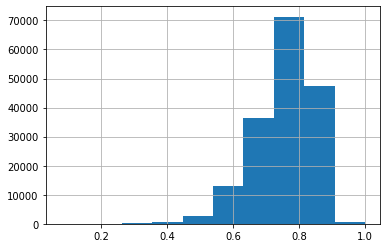

In [20]:
spotify['loudness'].hist()

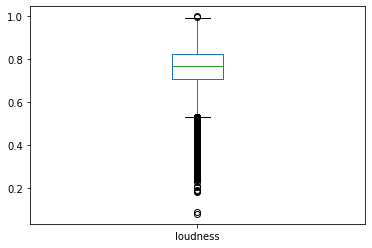

In [21]:
spotify['loudness'].plot.box()

**Parcialmente simetrico, é possivel se aplicar o Z-Score.**

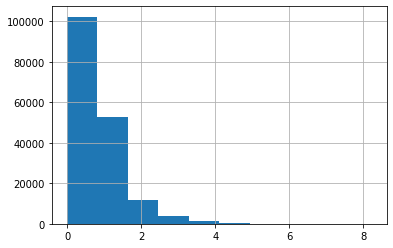

In [22]:
mad = abs(spotify['loudness'] - spotify['loudness'].median()).median()*(1/0.6745)
(abs(spotify['loudness'] - spotify['loudness'].median())/mad).hist()

In [23]:
spotify[abs(spotify['loudness'] - spotify['loudness'].median())/mad > 3.75]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
95,0.983,['Gustavo Obligado'],0.2120,451500,0.014800,1,2lPgRiJE3LXsi9ABxNNVnV,0.727000,2,0.6990,0.419904,0,Descuernacabras (Live),0,1920-01-01,0.0434,76.734,0.03990,1920
137,0.984,['Gustavo Obligado'],0.1570,444377,0.015100,1,44J1CFMxIyTPlevcDghAsk,0.860000,7,0.0402,0.370918,0,Ravel Ravel (Live),0,1920-01-01,0.0494,70.169,0.07730,1920
229,0.505,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.2330,686664,0.008170,0,0yxeAe7MlS0UWZVdNZVZWw,0.000203,8,0.1090,0.355321,1,Raja Manggala,3,1921-01-01,0.0305,108.143,0.18500,1921
246,0.849,"['Sergei Rachmaninoff', 'Yuri Temirkanov', 'St...",0.0663,537733,0.025700,0,1xGx91Ks3RQFqyam0Fdrky,0.956000,6,0.0709,0.452055,0,"No. 14, Vocalise",1,1921-01-01,0.0472,74.282,0.03480,1921
260,0.653,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.7270,301357,0.011600,0,2X6BN8RXjr4ArIEhjGa6QV,0.000038,3,0.2040,0.423475,0,Tedhak Saking,1,1921-01-01,0.2200,132.413,0.23100,1921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173201,0.961,['Deep Sleep Music Collective'],0.1280,122410,0.000793,0,2IOK9ETnjo05WJYbuEg8uI,0.933000,1,0.1080,0.347647,1,Moonbeam,63,2016-11-07,0.0505,77.394,0.03500,2016
173281,0.956,['Deep Sleep Music Collective'],0.1320,121104,0.001570,0,2nvvKQCQdiTlgTwRQCqnkx,0.964000,4,0.0983,0.348446,1,Sleeping Music (Calm Sleep),62,2016-11-07,0.0530,71.505,0.03760,2016
173439,0.996,['Empty Fields'],0.1670,200694,0.263000,0,7lVgv8KhBQHbmbQrxpVEKM,0.937000,8,0.1010,0.246167,0,Aero Noise,61,2017-05-07,0.0649,140.616,0.00001,2017
173853,0.877,['WNX'],0.1490,200000,0.254000,0,4WIupOFPnMTMYf3DVBbQ62,0.965000,1,0.1110,0.334837,1,Lo-Air,67,2019-04-26,0.0728,137.110,0.06780,2019


**São audios que em sua maioria são trilhas sonoras ou sons ambientes, devem ser removidos.**

In [24]:
spotify = spotify[abs(spotify['loudness'] - spotify['loudness'].median())/mad < 3.75]

### *Razão de Duas Váriaveis (Bivariado)*

**4. duration_ms x 16. speechiness**

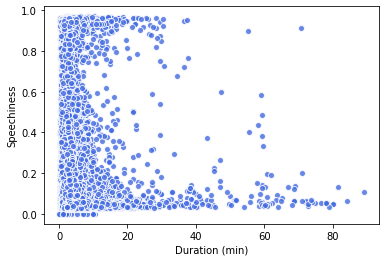

In [25]:
plt.scatter(spotify['duration_ms']/60000, spotify['speechiness'], c= 'royalblue',edgecolors='white',alpha=0.8)
plt.ylabel("Speechiness")
plt.xlabel("Duration (min)")
plt.show()

In [26]:
#Criando coluna duration
spotify['duration'] = spotify['duration_ms']/60000

In [27]:
spotify = spotify[spotify['speechiness'] > 0]

In [28]:
spotify['speech_per_min'] = spotify['speechiness']/spotify['duration']
spotify['speech_per_min'].describe()

count    171116.000000
mean          0.040503
std           0.101366
min           0.000420
25%           0.009176
50%           0.013546
75%           0.025088
max           3.731626
Name: speech_per_min, dtype: float64

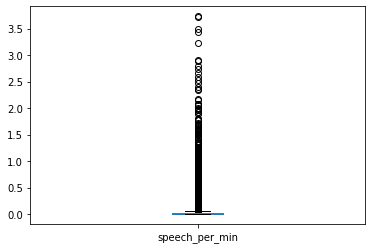

In [29]:
spotify['speech_per_min'].plot.box()

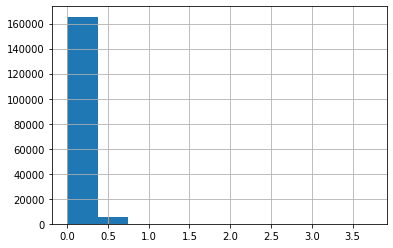

In [30]:
spotify['speech_per_min'].hist()

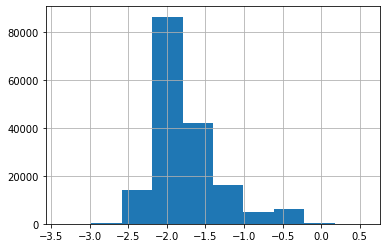

In [31]:
spotify['speech_per_min_log'] = np.log10(spotify['speech_per_min'])
spotify['speech_per_min_log'].hist()

**Distribuição é razoavelmente simetrica**

In [32]:
mad = abs(spotify['speech_per_min_log'] - spotify['speech_per_min_log'].median()).median()*(1/0.6745)
print(mad)

0.29983023438901313


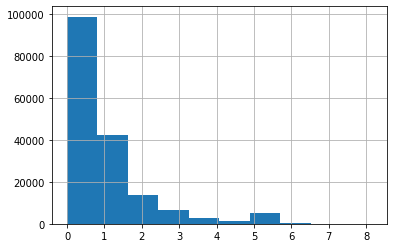

In [33]:
(abs(spotify['speech_per_min_log']-spotify['speech_per_min_log'].median())/mad).hist()

In [34]:
spotify[abs(spotify['speech_per_min_log']-spotify['speech_per_min_log'].median())/mad >= 4.9]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration,speech_per_min,speech_per_min_log
189,0.394000,['OsamaBeenLeanin'],0.367,20167,0.555,1,5VIYNqIf3f8dYKZLiC8LfX,0.1340,11,0.669,0.810007,1,SideRaq Osama (Intro),0,1920-11-23,0.168,80.428,0.589,1920,0.336117,0.499826,-0.301181
357,0.797000,['Fernando Pessoa'],0.695,98200,0.263,0,021ht4sdgPcrDgSk7JTbKY,0.0000,0,0.148,0.592968,1,CapÃ­tulo 2.16 - Banquero Anarquista,0,1922-06-01,0.957,102.009,0.655,1922,1.636667,0.584725,-0.233048
364,0.794000,['Fernando Pessoa'],0.676,99100,0.235,0,0OYGe21oScKJfanLyM7daU,0.0000,11,0.210,0.588098,0,CapÃ­tulo 2.8 - Banquero Anarquista,0,1922-06-01,0.960,96.777,0.724,1922,1.651667,0.581231,-0.235651
365,0.578000,['Fernando Pessoa'],0.750,132700,0.229,0,0PE42H6tslQuyMMiGRiqtb,0.0000,2,0.314,0.593892,1,CapÃ­tulo 2.25 - Banquero Anarquista,0,1922-06-01,0.955,102.629,0.531,1922,2.211667,0.431801,-0.364716
369,0.754000,['Fernando Pessoa'],0.687,96600,0.198,0,0cC9CYjLRIzwchQ42xVnq6,0.0000,4,0.197,0.559643,0,CapÃ­tulo 1.23 - Banquero Anarquista,0,1922-06-01,0.962,78.453,0.478,1922,1.610000,0.597516,-0.223651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173954,0.000265,['Andrew Bayer'],0.710,31386,0.699,0,19pjh0a99CIhA2GZr7RxUT,0.0191,6,0.504,0.856393,0,Voltage Control (FYHYM2019),3,2020-01-05,0.236,130.021,0.733,2020,0.523100,0.451157,-0.345673
174128,0.772000,['DJ X-Change'],0.620,30250,0.475,0,7iqCw8dAglSWcXXne7RBlf,0.0000,0,0.508,0.811526,1,New Years Eve Ultimate Countdown 2020,8,2019-12-16,0.541,93.056,0.321,2019,0.504167,1.073058,0.030623
174166,0.572000,['English Languagecast'],0.731,32373,0.173,0,6XZMbNo7U3cHmiwsQRdySD,0.0000,5,0.124,0.736512,0,The Year 2020 Changed Everything in My Life,6,2021-01-03,0.872,90.527,0.390,2021,0.539550,1.616162,0.208485
174311,0.615000,['Jazmine Sullivan'],0.659,60347,0.326,0,5d4Qhq6PfU30fooeIpAZjp,0.0000,8,0.183,0.716451,1,Rashida's Tale,60,2021-01-08,0.503,116.004,0.569,2021,1.005783,0.500108,-0.300936


**Em sua grande maioria são livros, podcasts e transmissões, devem ser removidos.**

In [35]:
spotify = spotify[abs(spotify['speech_per_min_log']-spotify['speech_per_min_log'].median())/mad < 4.9]

In [36]:
spotify = spotify.drop(columns=['speech_per_min_log','speech_per_min','duration'])

### *Isolation Forests (Multivariado)*

In [37]:
spotify.dtypes

acousticness               float64
artists                   category
danceability               float64
duration_ms                  int64
energy                     float64
explicit                     int64
id                        category
instrumentalness           float64
key                          int64
liveness                   float64
loudness                   float64
mode                         int64
name                      category
popularity                   int64
release_date        datetime64[ns]
speechiness                float64
tempo                      float64
valence                    float64
year                         int64
dtype: object

**Removendo dados categoricos**

In [38]:
artists = spotify['artists']
id = spotify['id']
name = spotify['name']
release_date = spotify['release_date']
spotify = spotify.drop(columns=['artists','id','name',"release_date"])

In [39]:
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(spotify)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=100, n_estimators=100,
                n_jobs=None,
                random_state=RandomState(MT19937) at 0x7FE0A7EA96B0, verbose=0,
                warm_start=False)

In [40]:
scores = clf.predict(spotify)
spotify['outlier'] = scores

**Desfazendo alterações**

In [41]:
spotify['artists'] = artists
spotify['id'] = id
spotify['name'] = name
spotify['release_date'] = release_date

In [42]:
spotify[spotify['outlier'] == -1]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,outlier,artists,id,name,release_date
1,0.643000,0.852,150200,0.5170,0,0.026400,5,0.0809,0.825918,0,7,0.0534,86.889,0.9500,1920,-1,"[""Screamin' Jay Hawkins""]",0hbkKFIJm7Z05H8Zl9w30f,I Put A Spell On You,1920-01-05
3,0.000173,0.730,422087,0.7980,0,0.801000,2,0.1280,0.825135,1,17,0.0425,127.997,0.0422,1920,-1,['Oscar Velazquez'],19Lc5SfJJ5O1oaxY0fpwfh,True House Music - Xavier Santos & Carlos Gomi...,1920-01-01
4,0.295000,0.704,165224,0.7070,1,0.000246,10,0.4020,0.845102,0,2,0.0768,122.076,0.2990,1920,-1,['Mixe'],2hJjbsLCytGsnAHfdsLejp,Xuniverxe,1920-10-01
9,0.006820,0.571,476304,0.7530,0,0.873000,8,0.0920,0.830898,1,0,0.0446,126.993,0.1190,1920,-1,['Meetya'],06NUxS2XL3efRh0bloxkHm,Broken Puppet - Original Mix,1920-01-01
10,0.952000,0.688,150067,0.2200,0,0.000000,6,0.2620,0.701464,0,0,0.8450,82.024,0.4140,1920,-1,['Dorville'],07jrRR1CUUoPb1FLfSy9Jh,Oouin,1920-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174369,0.995000,0.297,349200,0.0287,0,0.908000,8,0.0995,0.469689,1,0,0.0564,141.636,0.0678,2021,-1,"['Ludovico Einaudi', 'Johannes BornlÃ¶f']",2LeqqwzobL5ktfQhWA3bHh,Nuvole bianche,2021-01-23
174371,0.995000,0.343,206700,0.0165,0,0.878000,9,0.0774,0.455485,0,0,0.0455,126.970,0.1510,2021,-1,"['Ludovico Einaudi', 'Johannes BornlÃ¶f']",3Glmyv3hbGGTgeR3FZrxJA,Una Mattina,2021-01-23
174373,0.966000,0.269,424200,0.0926,0,0.890000,9,0.0992,0.559392,0,0,0.0609,120.323,0.1020,2021,-1,"['Ludovico Einaudi', 'Johannes BornlÃ¶f']",4yBReaKJW78ZYCHpc1cfaK,Divenire,2021-01-23
174375,0.988000,0.316,303333,0.0573,0,0.879000,3,0.1200,0.561882,1,0,0.0515,81.070,0.0373,2021,-1,"['Ludovico Einaudi', 'Johannes BornlÃ¶f']",6QGVWUbmlePAiY5zJjfCmT,Night,2021-01-23


**Dado ao número de outliers encontrados pude observar que eles não são poucos e não são variados. O que me leva a buscar um outro tipo de abordagem que talvez encaixe melhor que o Isolation Forests.**

In [43]:
spotify = spotify.drop(columns=['outlier'])

### *Local Outlier Factor (Multivariado)*

**Removendo dados categoricos**

In [44]:
artists = spotify['artists']
id = spotify['id']
name = spotify['name']
release_date = spotify['release_date']
spotify = spotify.drop(columns=['artists','id','name',"release_date"])

In [45]:
clf = LocalOutlierFactor(n_neighbors=10)
scores = clf.fit_predict(spotify)
spotify['outlier'] = scores

**Desfazendo alterações**

In [46]:
spotify['artists'] = artists
spotify['id'] = id
spotify['name'] = name
spotify['release_date'] = release_date

In [47]:
spotify[spotify['outlier'] == -1]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,outlier,artists,id,name,release_date
22,0.08080,0.389,774360,0.810,0,0.918000,1,0.3320,0.765296,1,0,0.1090,161.322,0.071,1920,-1,['Tr0ma'],0RdLX7r5HrPOGQabZIjCfi,Big Rip,1920-01-01
37,0.00744,0.737,225707,0.328,0,0.000002,0,0.0765,0.645212,1,0,0.0526,172.025,0.798,1920,-1,['Ron van der Kraan'],0gIniSwikXODTBupqYPCI1,Sweat (A La La La La Long),1920-01-03
55,0.43500,0.680,88696,0.939,0,0.879000,6,0.0924,0.854154,1,0,0.0649,183.958,0.924,1920,-1,['No.Losiento'],1Bn6okAC9ntFOhKnsJPZkG,Playground Sparks,1920-01-01
67,0.21900,0.609,247678,0.322,0,0.848000,1,0.1230,0.740099,0,0,0.0359,154.044,0.292,1920,-1,['Konbeatz'],1bzr8IhTopsIKToYnjIyTS,Airplanes,1920-04-20
71,0.04030,0.666,257313,0.914,0,0.731000,7,0.0982,0.875311,1,0,0.0305,127.016,0.759,1920,-1,['Gianni Negro'],1vRn5VowmIoCNOyuy9GIm6,Big White - Radio Edit,1920-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174083,0.08040,0.771,148927,0.526,1,0.000000,1,0.6630,0.832449,1,70,0.0718,104.036,0.182,2020,-1,"['Ty Dolla $ign', 'JhenÃ© Aiko', 'Mustard']",1psvnQxSDdIKTDM2Jm8QKt,By Yourself (feat. JhenÃ© Aiko & Mustard),2020-10-23
174253,0.21200,0.785,239493,0.881,0,0.000000,8,0.7540,0.873777,0,0,0.0505,113.999,0.728,2021,-1,['Don Omar'],5dMBxRcKCnJpTWxGgNL4XO,Virtual Diva,2021-01-22
174267,0.09510,0.857,181333,0.855,0,0.000102,7,0.0443,0.859635,1,0,0.1340,95.016,0.798,2021,-1,"['Don Omar', 'Tego Calderon']",612viEXUeK8z63ExQz3Al0,Sandunga,2021-01-22
174275,0.21000,0.786,239493,0.884,0,0.000000,8,0.7540,0.873792,0,0,0.0496,113.991,0.728,2021,-1,['Don Omar'],6CovYcYrysJDssssOpSfk8,Virtual Diva,2021-01-22


In [48]:
spotify = spotify[spotify['outlier'] == 1]

**Removendo Outliers**

In [49]:
spotify = spotify.drop(columns=['outlier'])

# **Análise e Visualização dos Dados**

## Desenvolvimento dos Parâmetros ao Longo dos Anos

### **7. id**

In [ ]:
spotify.groupby('year')['id'].count()

year
1920     318
1921     141
1922      66
1923     179
1924     217
        ... 
2017    1991
2018    2420
2019    2112
2020    3446
2021    1324
Name: id, Length: 102, dtype: int64

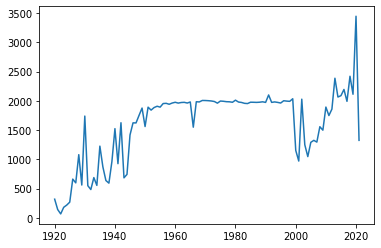

In [ ]:
plt.plot(spotify.groupby('year')['id'].count())

**A tendência é que cada vez mais faixas sejam produzidas por ano.** 

Como há uma grande discrepância entre o número de faixas por ano, a melhor abordagem para se observar o desenvolvimento dos próximos parâmetros ao longo dos anos é utilizando a média daquele mesmo ano.

### **1. acousticness**

In [ ]:
spotify['acousticness'].describe()

count    162859.00000
mean          0.49827
std           0.38154
min           0.00000
25%           0.08430
50%           0.51600
75%           0.89700
max           0.99600
Name: acousticness, dtype: float64

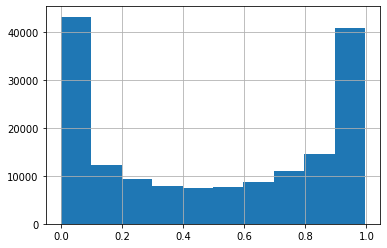

In [ ]:
spotify['acousticness'].hist()

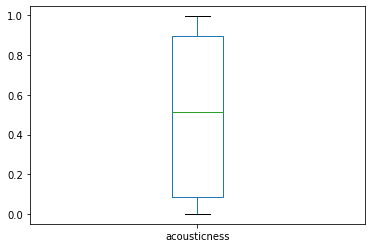

In [ ]:
spotify['acousticness'].plot.box()

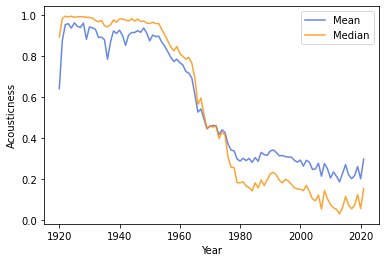

In [ ]:
plt.plot(spotify.groupby('year')['acousticness'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['acousticness'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Acousticness')
plt.show()

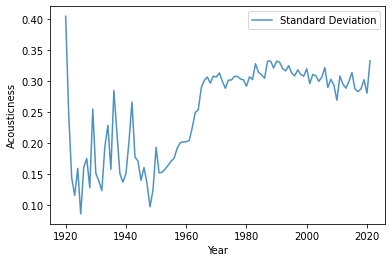

In [ ]:
plt.plot(spotify.groupby('year')['acousticness'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Acousticness')
plt.show()

**Ao longo dos anos houve uma diminuição da acustica nas faixas produzidas**

Isso pode revelar uma aumento da relevância de componentes eletrônicos na produção das músicas, mesmo que, como podemos observar analisando o alto desvio padrão, componentes acusticos ainda são presentes.

### **3. danceability**

In [ ]:
spotify['danceability'].describe()

count    162859.000000
mean          0.534065
std           0.174602
min           0.055900
25%           0.412000
50%           0.542000
75%           0.661000
max           0.988000
Name: danceability, dtype: float64

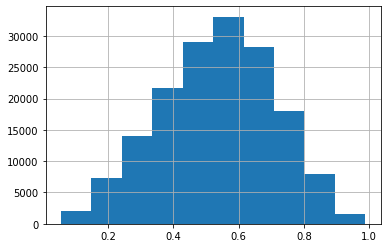

In [ ]:
spotify['danceability'].hist()

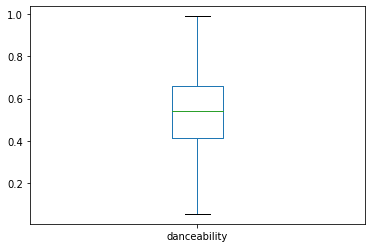

In [ ]:
spotify['danceability'].plot.box()

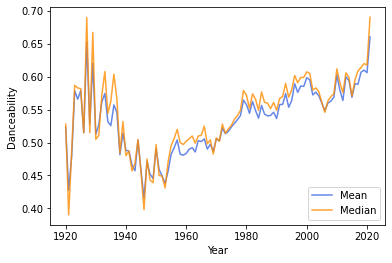

In [ ]:
plt.plot(spotify.groupby('year')['danceability'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['danceability'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Danceability')
plt.show()

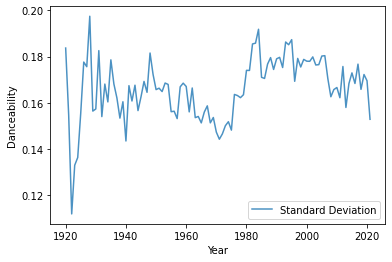

In [ ]:
plt.plot(spotify.groupby('year')['danceability'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Danceability')
plt.show()

**Há uma tendência para produção de faixas mais dançantes**

Provavelmente isso tem grande influência dos novos ritmos que tem surgido e se tornado populares.

ex. *Funk, Eletronic e etc*

### **5. energy**

In [ ]:
spotify['energy'].describe()

count    162859.000000
mean          0.493458
std           0.269164
min           0.000020
25%           0.265000
50%           0.481000
75%           0.717000
max           1.000000
Name: energy, dtype: float64

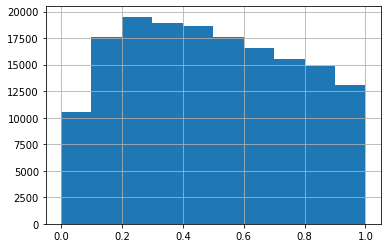

In [ ]:
spotify['energy'].hist()

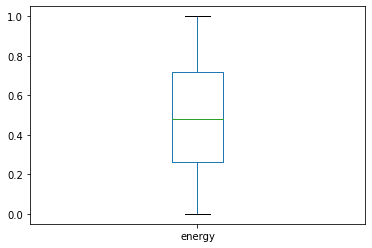

In [ ]:
spotify['energy'].plot.box()

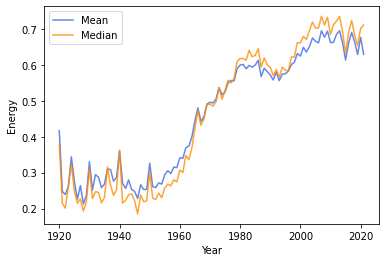

In [ ]:
plt.plot(spotify.groupby('year')['energy'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['energy'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Energy')
plt.show()

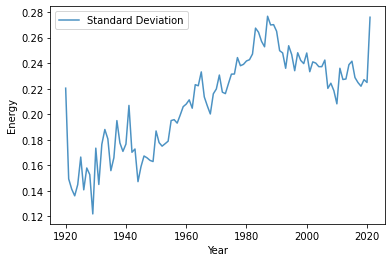

In [ ]:
plt.plot(spotify.groupby('year')['energy'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Energy')
plt.show()

**As músicas tem se tornado mais intensas e energicas.**

### **6. explicit**

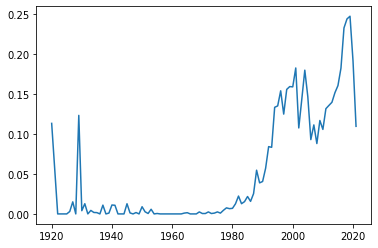

In [ ]:
plt.plot(spotify.groupby('year')['explicit'].mean())

**Houve um aumento na produção de faixas com conteúdo explicito, alcançando em 2020 cerca de 25% das produções.**

### **8. instrumentalness**

In [ ]:
spotify['instrumentalness'].describe()

count    162859.000000
mean          0.195635
std           0.332130
min           0.000000
25%           0.000002
50%           0.000654
75%           0.247000
max           0.999000
Name: instrumentalness, dtype: float64

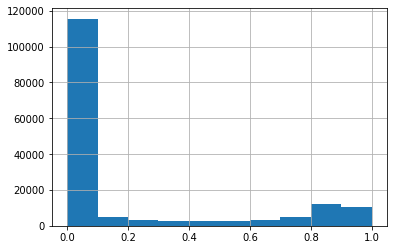

In [ ]:
spotify['instrumentalness'].hist()

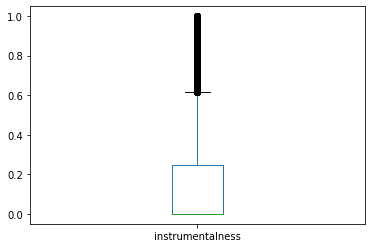

In [ ]:
spotify['instrumentalness'].plot.box()

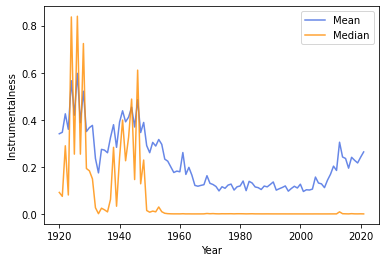

In [ ]:
plt.plot(spotify.groupby('year')['instrumentalness'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['instrumentalness'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Instrumentalness')
plt.show()

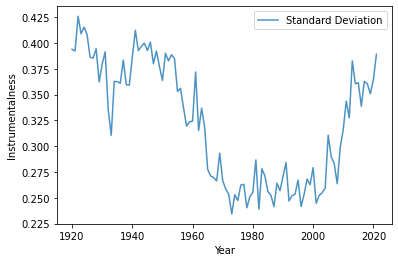

In [ ]:
plt.plot(spotify.groupby('year')['instrumentalness'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Instrumentalness')
plt.show()

**Muito provavelmente ainda existem outliers relacionados a esse parâmetro**

Dado a grande diferença entre a média e a mediana e o alto desvio padrão, sabemos que os dados possuem valores muito discrepantes.

### **10. liveness**

In [ ]:
spotify['liveness'].describe()

count    162859.000000
mean          0.209205
std           0.180284
min           0.009670
25%           0.098400
50%           0.136000
75%           0.266000
max           1.000000
Name: liveness, dtype: float64

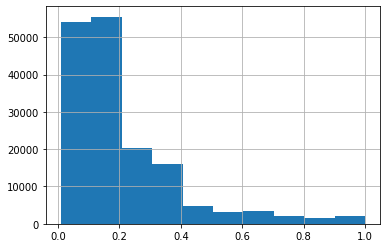

In [ ]:
spotify['liveness'].hist()

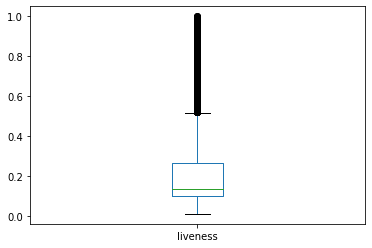

In [ ]:
spotify['liveness'].plot.box()

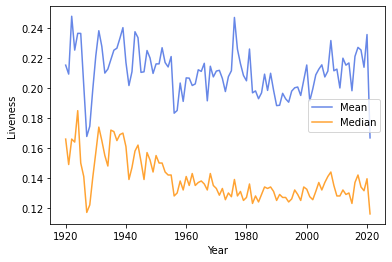

In [ ]:
plt.plot(spotify.groupby('year')['liveness'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['liveness'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Liveness')
plt.show()

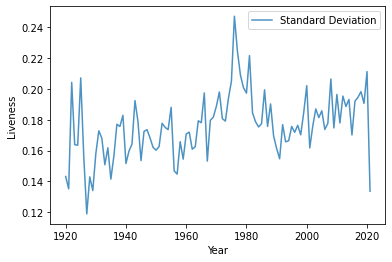

In [ ]:
plt.plot(spotify.groupby('year')['liveness'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Liveness')
plt.show()

In [ ]:
spotify[spotify['liveness'] > 0.7]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,artists,id,name,release_date
42,0.995000,0.534,176360,0.191,0,0.098200,7,0.805,0.521463,0,0,0.0508,70.059,0.6050,1920,['Mamie Smith & Her Jazz Hounds'],0sj3QeaCpacCfxL4c5TQBl,Mean Man,1920-01-01
188,0.994000,0.402,212333,0.161,0,0.000001,1,0.710,0.414897,1,0,0.0521,82.394,0.4510,1920,['Mistinguett'],5SY5AFYWfwwFbTKnmQKEsx,Mon Homme,1920-01-01
373,0.985000,0.370,153533,0.372,0,0.000681,2,0.929,0.399217,1,0,0.0865,159.669,0.7530,1922,['Ignacio Corsini'],0l3BQsVJ7F76wlN5QhJzaP,El Vendaval - Remasterizado,1922-03-21
385,0.974000,0.273,168107,0.318,0,0.163000,6,0.778,0.357241,1,0,0.0694,74.542,0.4140,1922,['Ignacio Corsini'],1KLKkACG16o5crQPiaF1Tz,Tus Suspiros - Remasterizado,1922-03-29
409,0.990000,0.543,130987,0.424,0,0.037900,5,0.861,0.362190,1,0,0.2690,68.567,0.6590,1922,['Ignacio Corsini'],2UU5t5j325ofKGcg7oUQNh,Sin Amor - Remasterizado,1922-03-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173956,0.004170,0.522,73523,0.931,0,0.007530,10,0.703,0.735514,0,1,0.2830,130.642,0.4720,2020,"['NWYR', 'Andrew Rayel']",4XpXwyVE0gtOxIypTi89YD,The Melody (FYHYM2019),2020-01-05
173958,0.893000,0.492,334765,0.264,0,0.004110,9,0.940,0.365671,1,0,0.0579,102.091,0.4760,2019,['Jorma Kaukonen'],1l6aOIBByjjIGRFwsUwDmg,Too Many Years - Late Show - Live,2019-07-26
174085,0.084900,0.787,148759,0.713,1,0.000000,7,0.717,0.741182,1,70,0.4010,175.046,0.7610,2020,['NLE Choppa'],44sYqNBttbXNxya33FJ3Dj,Camelot,2020-08-10
174108,0.000629,0.460,217339,0.993,0,0.775000,3,0.716,0.690287,0,14,0.3500,141.385,0.0589,2020,"['Starpicker', 'Billy Gillies']",0sxJdPUhjpb3dZlaDewEyu,Origins (Billy Gillies Remix) - Mixed,2020-12-28


**Existe uma predominância geral ao longo dos anos de faixas que não sejam gravadas ao vivo.**

Em sua grande maioria foram gravadas em estudios ou em locais reservados.

### **11. loudness**

In [ ]:
spotify['loudness'].describe()

count    162859.000000
mean          0.567005
std           0.148655
min           0.036826
25%           0.480235
50%           0.587750
75%           0.679613
max           1.000000
Name: loudness, dtype: float64

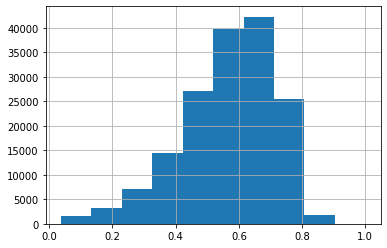

In [ ]:
spotify['loudness'].hist()

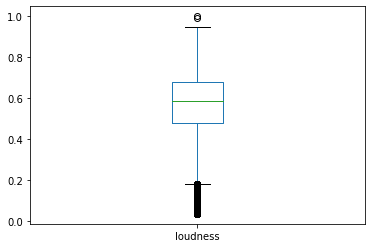

In [ ]:
spotify['loudness'].plot.box()

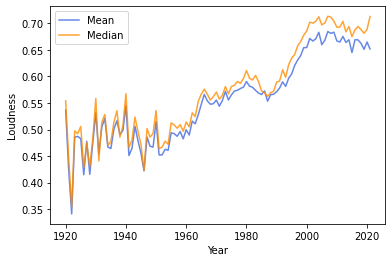

In [ ]:
plt.plot(spotify.groupby('year')['loudness'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['loudness'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Loudness')
plt.show()

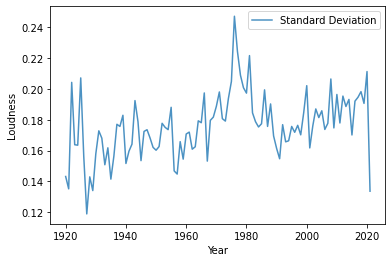

In [ ]:
plt.plot(spotify.groupby('year')['liveness'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Loudness')
plt.show()

**As faixas passaram a ter volumes mais altos ao longo dos anos.**



### **14. popularity**

In [ ]:
spotify['popularity'].describe()

count    162859.000000
mean         26.978006
std          21.685071
min           0.000000
25%           4.000000
50%          27.000000
75%          43.000000
max         100.000000
Name: popularity, dtype: float64

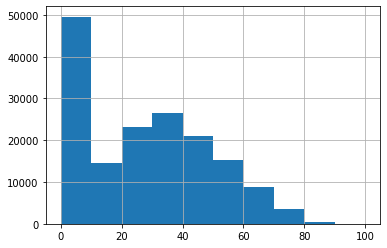

In [ ]:
spotify['popularity'].hist()

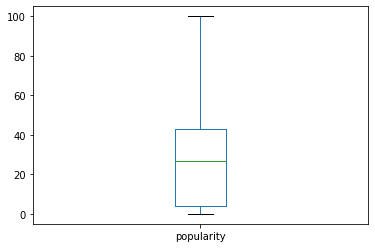

In [ ]:
spotify['popularity'].plot.box()

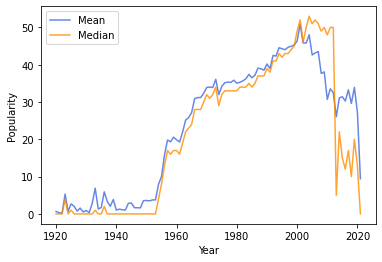

In [ ]:
plt.plot(spotify.groupby('year')['popularity'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['popularity'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

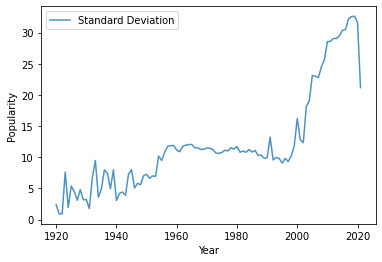

In [ ]:
plt.plot(spotify.groupby('year')['popularity'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

In [ ]:
spotify[spotify['popularity'] > 60].describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,11823.000000,11823.000000,1.182300e+04,11823.000000,11823.000000,11823.000000,11823.000000,11823.000000,11823.000000,11823.000000,11823.000000,11823.000000,11823.000000,11823.000000,11823.000000
mean,0.258334,0.618301,2.251566e+05,0.628541,0.258310,0.039572,5.205616,0.179489,0.678388,0.653895,68.111055,0.091085,121.388532,0.516375,2006.178127
std,0.277679,0.159279,6.926643e+04,0.206322,0.437724,0.156041,3.560806,0.142064,0.103114,0.475747,5.894444,0.095615,29.148956,0.243680,14.925850
min,0.000002,0.060800,3.764000e+04,0.000099,0.000000,0.000000,0.000000,0.015000,0.036941,0.000000,61.000000,0.022300,46.718000,0.000000,1933.000000
25%,0.029800,0.515000,1.890000e+05,0.491000,0.000000,0.000000,2.000000,0.093600,0.633494,0.000000,63.000000,0.034900,97.495000,0.326000,1999.000000
50%,0.147000,0.628000,2.184400e+05,0.649000,0.000000,0.000002,5.000000,0.122000,0.701076,1.000000,67.000000,0.049400,120.040000,0.512000,2012.000000
75%,0.420000,0.734000,2.527870e+05,0.790000,1.000000,0.000384,8.000000,0.222000,0.747929,1.000000,72.000000,0.098400,140.063500,0.715000,2017.000000
max,0.996000,0.980000,4.120258e+06,1.000000,1.000000,0.999000,11.000000,0.986000,0.930894,1.000000,100.000000,0.856000,214.025000,0.991000,2021.000000


**Muitas faixas são lançadas e muitas delas são impopulares.**

A diminuição repentina na média de populariade por ano coincide com o periodo de grande aumento na produção das faixas.

(Ver analise do id)


### **16. speechiness**

In [ ]:
spotify['speechiness'].describe()

count    162859.000000
mean          0.077339
std           0.103374
min           0.022200
25%           0.034800
50%           0.044400
75%           0.069700
max           0.971000
Name: speechiness, dtype: float64

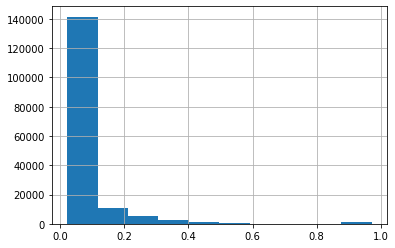

In [ ]:
spotify['speechiness'].hist()

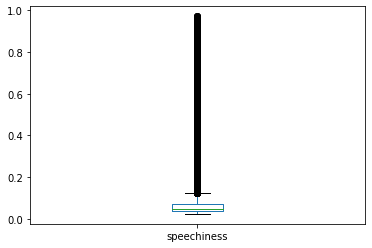

In [ ]:
spotify['speechiness'].plot.box()

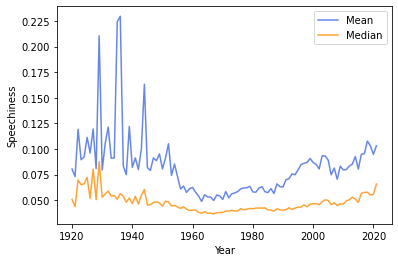

In [ ]:
plt.plot(spotify.groupby('year')['speechiness'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['speechiness'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Speechiness')
plt.show()

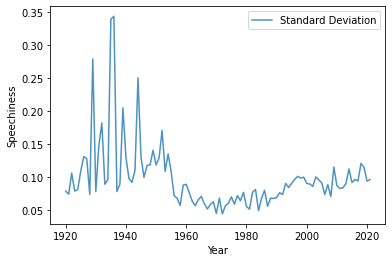

In [ ]:
plt.plot(spotify.groupby('year')['speechiness'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Speechiness')
plt.show()

In [ ]:
spotify[spotify['speechiness'] > 0.6].describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,1312.000000,1312.000000,1.312000e+03,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.00000,1312.000000,1312.000000,1312.000000,1312.000000
mean,0.651036,0.646613,3.655629e+05,0.327021,0.147104,0.025144,5.433689,0.350061,0.402093,0.629573,7.70122,0.880032,105.334743,0.512972,1952.189024
std,0.288622,0.093541,2.993728e+05,0.186961,0.354344,0.125838,3.721854,0.244321,0.121072,0.483103,12.44769,0.105394,28.980155,0.184500,24.328497
min,0.000928,0.208000,1.163070e+05,0.007690,0.000000,0.000000,0.000000,0.038000,0.045917,0.000000,0.00000,0.601000,43.969000,0.025800,1925.000000
25%,0.415000,0.615000,2.054380e+05,0.201000,0.000000,0.000000,2.000000,0.160750,0.325680,0.000000,0.00000,0.838500,82.427250,0.392750,1935.000000
50%,0.738000,0.667000,2.758195e+05,0.277000,0.000000,0.000000,6.000000,0.271000,0.383351,1.000000,0.00000,0.933000,101.634000,0.528000,1944.000000
75%,0.904000,0.710000,3.957600e+05,0.390250,0.000000,0.000004,9.000000,0.441250,0.481515,1.000000,13.00000,0.952000,125.272000,0.643000,1955.000000
max,0.996000,0.967000,4.234947e+06,0.983000,1.000000,0.958000,11.000000,0.985000,0.859975,1.000000,73.00000,0.971000,209.763000,0.972000,2021.000000


**A proporção de fala nas faixas ao longo dos anos tem se mantido relativamente constante**

### **17. tempo**

In [ ]:
spotify['tempo'].describe()

count    162859.000000
mean        117.242558
std          29.665510
min          33.944000
25%          94.470500
50%         116.037000
75%         135.011000
max         224.437000
Name: tempo, dtype: float64

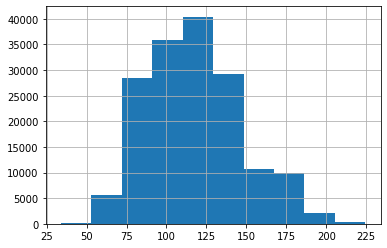

In [ ]:
spotify['tempo'].hist()

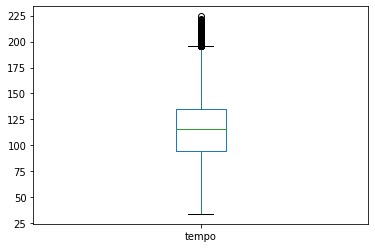

In [ ]:
spotify['tempo'].plot.box()

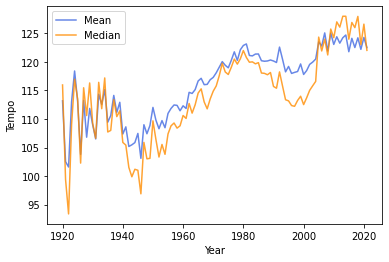

In [ ]:
plt.plot(spotify.groupby('year')['tempo'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['tempo'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Tempo')
plt.show()

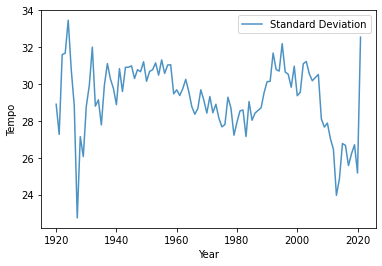

In [ ]:
plt.plot(spotify.groupby('year')['tempo'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Tempo')
plt.show()

**As faixas tem, em média, apresentado um crescimento nas batidas por minuto.**

Isso tem relação com um ritmo mais acelerado nas músicas.

### **18. valence**

In [ ]:
spotify['valence'].describe()

count    162859.000000
mean          0.527884
std           0.265516
min           0.000000
25%           0.311000
50%           0.538000
75%           0.750000
max           1.000000
Name: valence, dtype: float64

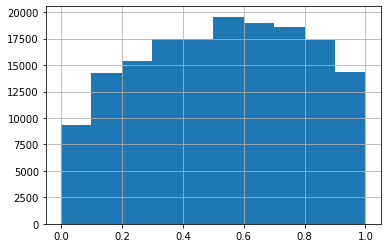

In [ ]:
spotify['valence'].hist()

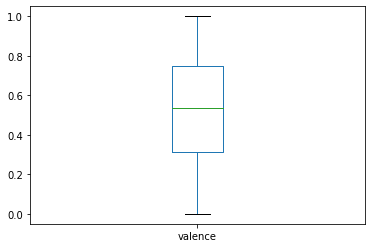

In [ ]:
spotify['valence'].plot.box()

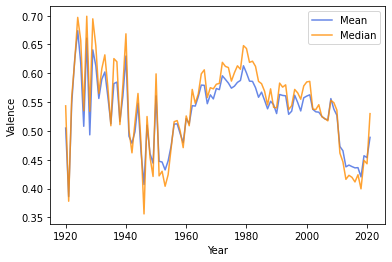

In [ ]:
plt.plot(spotify.groupby('year')['valence'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['valence'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Valence')
plt.show()

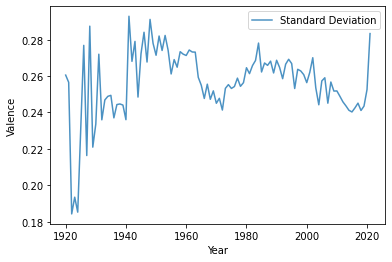

In [ ]:
plt.plot(spotify.groupby('year')['valence'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Valence')
plt.show()

**As faixas apresentam um queda na positividade músical ao longo dos anos**

Isso significa uma menor presença de setimentos positivos como felicidade e alegria.

## Correlação da Popularidade com os Outros Parâmetros

In [ ]:
spotify.cov()['popularity']

acousticness           -3.547112
danceability            0.632559
duration_ms        -10427.003640
energy                  1.870100
explicit                1.202079
instrumentalness       -2.391726
key                     0.081083
liveness               -0.288354
loudness                1.050598
mode                    0.022691
popularity            470.242304
speechiness            -0.115101
tempo                  62.266581
valence                 0.373439
year                  293.506125
Name: popularity, dtype: float64

In [ ]:
spotify.corr(method='pearson')['popularity']

acousticness       -0.428720
danceability        0.167067
duration_ms        -0.003416
energy              0.320396
explicit            0.240726
instrumentalness   -0.332080
key                 0.001067
liveness           -0.073758
loudness            0.325909
mode                0.002295
popularity          1.000000
speechiness        -0.051346
tempo               0.096793
valence             0.064859
year                0.521825
Name: popularity, dtype: float64

Observando as covariâncias e o método de correlação de pearson, os parâmetros que mais se relacionam com a popularidade são:

### **Antes: Categorizando popularity**

Essa categorização nos ajudará nas visualizações a seguir

In [ ]:
spotify_pop = spotify

In [ ]:
spotify_pop['pop_cut'] = pd.qcut(spotify_pop['popularity'],4)
spotify_pop['pop_cut'].value_counts()
spotify_pop['pop_cut'] = spotify_pop['pop_cut'].astype('category')

### **1. acousticness x popularity**

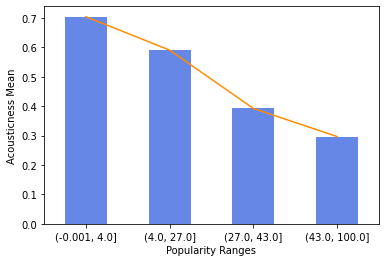

In [ ]:
spotify_pop.groupby('pop_cut')['acousticness'].mean().plot.bar(color='royalblue',alpha=0.8)
spotify_pop.groupby('pop_cut')['acousticness'].mean().plot(color= 'darkorange')
plt.xlabel('Popularity Ranges')
plt.ylabel('Acousticness Mean')
plt.show()

**A acustica das faixas diminui a medida que a popularidade aumenta.**

### **5. energy x popularity**

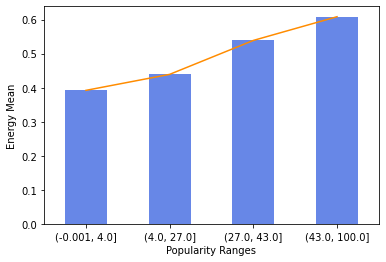

In [ ]:
spotify_pop.groupby('pop_cut')['energy'].mean().plot.bar(color='royalblue',alpha=0.8)
spotify_pop.groupby('pop_cut')['energy'].mean().plot(color= 'darkorange')
plt.xlabel('Popularity Ranges')
plt.ylabel('Energy Mean')
plt.show()

**Aqui podemos observar claramente uma relação positiva entre a energia e a popularidade das faixas**

### **6. explicit x popularity**

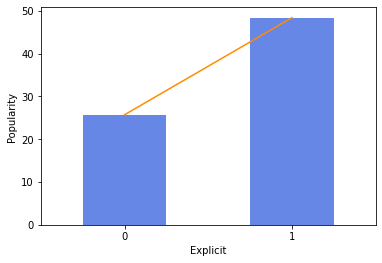

In [ ]:
spotify_pop.groupby('explicit')['popularity'].mean().plot.bar(color='royalblue',alpha=0.8)
spotify_pop.groupby('explicit')['popularity'].mean().plot(color= 'darkorange')
plt.xlabel('Explicit')
plt.ylabel('Popularity')
plt.show()

**Conteúdos explicitos são em média mais populares que conteúdos não explicitos**

### **8. instrumentalness x popularity**

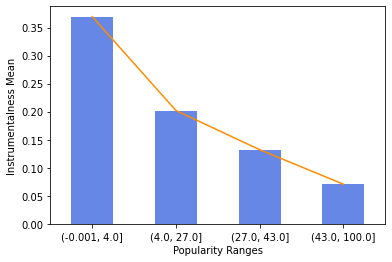

In [ ]:
spotify_pop.groupby('pop_cut')['instrumentalness'].mean().plot.bar(color='royalblue',alpha=0.8)
spotify_pop.groupby('pop_cut')['instrumentalness'].mean().plot(color= 'darkorange')
plt.xlabel('Popularity Ranges')
plt.ylabel('Instrumentalness Mean')
plt.show()

**As musicas mais populares em média apresentam conteúdo vocal**

### **11. loudness x popularity**

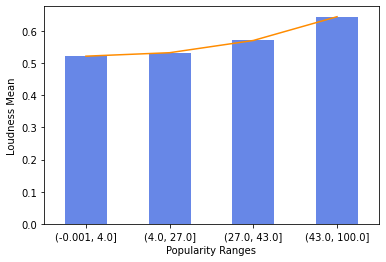

In [ ]:
spotify_pop.groupby('pop_cut')['loudness'].mean().plot.bar(color='royalblue',alpha=0.8)
spotify_pop.groupby('pop_cut')['loudness'].mean().plot(color= 'darkorange')
plt.xlabel('Popularity Ranges')
plt.ylabel('Loudness Mean')
plt.show()

**Mesmo que a covariancia entre popularidade e a altura em db apareça com um bom coeficiente nas covariâncias e em pearson, não observo uma relação relevante entre as duas variaveis. Há uma leve tendência de relação positiva.**

# **Teste de Hipótese**

## A Popularidade das Faixas Explicitas e Não Explicitas seguem a Mesma Distribuição. (Mann-Whitney U Test)

**Dividindo e Verificando os Dois Grupos**

Essa é uma verificação de dois grupos não pareados.

In [ ]:
explicit = spotify[spotify['explicit'] == 1]
not_explicit = spotify[spotify['explicit'] == 0]

In [ ]:
explicit['popularity'].describe()

count    9150.000000
mean       48.373443
std        22.182790
min         0.000000
25%        38.000000
50%        53.000000
75%        65.000000
max       100.000000
Name: popularity, dtype: float64

In [ ]:
not_explicit['popularity'].describe()

count    153709.000000
mean         25.704376
std          20.977931
min           0.000000
25%           3.000000
50%          26.000000
75%          41.000000
max          94.000000
Name: popularity, dtype: float64

**Buscando Outliers**

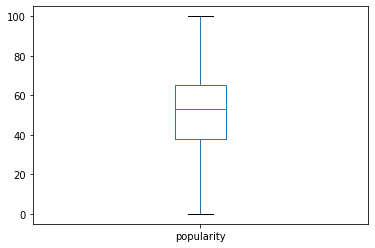

In [ ]:
explicit['popularity'].plot.box()

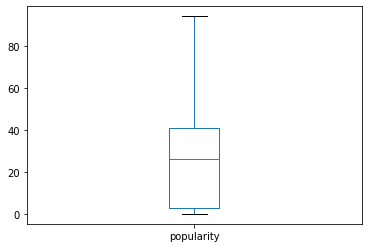

In [ ]:
not_explicit['popularity'].plot.box()

**Verificando se os grupos seguem a Normal**

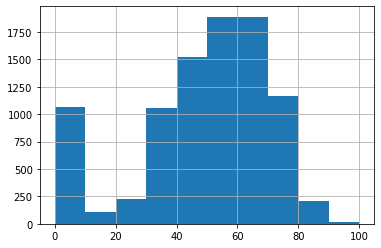

In [ ]:
explicit['popularity'].hist()

In [ ]:
#Teste de Normalidade D’Agostino’s K^2 (Shapiro não tem precisão para amostras com N > 5000)
stats.normaltest(explicit['popularity'])

NormaltestResult(statistic=879.6082997965182, pvalue=9.89656726989652e-192)

**explicit['popularity'] provavelmente segue uma gaussiana**

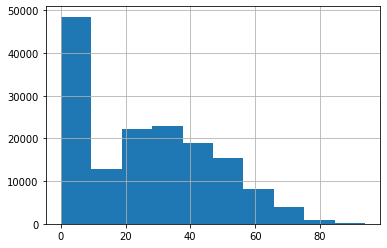

In [ ]:
not_explicit['popularity'].hist()

In [ ]:
#Teste de Normalidade D’Agostino’s K^2 (Shapiro não tem precisão para amostras com N > 5000)
stats.normaltest(not_explicit['popularity'])

NormaltestResult(statistic=26066.377397065313, pvalue=0.0)

**not_explicit['popularity'] provavelmente não segue uma gaussiana**

Melhor abordagem dada a situação é utilizar o Mann-Whitney U Test para verificar a hipotese.

In [ ]:
stats.mannwhitneyu(explicit['popularity'], not_explicit['popularity'])

MannwhitneyuResult(statistic=316405925.0, pvalue=0.0)

**Dado o resultado, podemos observar que essa hipotese é falsa**

Logo, a popularidade das faixas explicitas e não explicitas vem de distribuições diferentes.

# **Predição de Popularidade**

**2° Projeto** da disciplina **IF697 — Introdução à Ciência dos Dados**

**Algoritmos de Regressão Escolhidos:**

1.   Multi-Layer Perceptron Regression
2.   ElasticNet Regression
3.   Random Forest Regression
4.   Nearest Neighbors Regression



## Importando Modelos e Bibliotecas

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from urllib.parse import urlparse
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [51]:
#Instalando Optuna
!pip install --quiet optuna
import optuna

In [52]:
#Instalando MLFlow
!pip install mlflow
import mlflow
from mlflow.tracking import MlflowClient

## Separando Conjuntos de Treinamento, Validação e Teste

In [53]:
variables = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
X = spotify[variables]
y = spotify['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.4, random_state=1)

## Treinando Modelos e Analisando Hiperparâmetros

In [54]:
#Função de Print
def print_auto_logged_info(r):
    tags = {k: v for k, v in r.data.tags.items() if not k.startswith("mlflow.")}
    artifacts = [f.path for f in MlflowClient().list_artifacts(r.info.run_id, "model")]
    print("run_id: {}".format(r.info.run_id))
    print("artifacts: {}".format(artifacts))
    print("params: {}".format(r.data.params))
    print("metrics: {}".format(r.data.metrics))
    print("tags: {}".format(tags))

Obs: Alguns modelos podem demorar bastante tempo para serem analizados.

### **1. ElasticNetRegressor**

In [62]:
def objective(trial): 
      alpha = trial.suggest_float('alpha', 1.0, 10.0)
      l1_ratio = trial.suggest_float('l1_ratio', 0.1, 1.0)
      elnet = ElasticNet(alpha= alpha, l1_ratio= l1_ratio)
      with mlflow.start_run() as run:
        elnet.fit(X_train, y_train)
        elnet_predict = elnet.predict(X_validation)

        mlflow.log_param("alpha", alpha)
        mlflow.log_param("l1_ratio", l1_ratio)

        mlflow.log_metric("mse", mean_squared_error(y_validation, elnet_predict))
        mlflow.log_metric("mae", mean_absolute_error(y_validation, elnet_predict))
        mlflow.log_metric("r2", r2_score(y_validation, elnet_predict))

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
        if tracking_url_type_store != "file":
          mlflow.sklearn.log_model(elnet, "model", registered_model_name="ElasticNetModel")
        else:
          mlflow.sklearn.log_model(elnet, "model")
      print_auto_logged_info(mlflow.get_run(run_id=run.info.run_id))
      return r2_score(y_validation, elnet_predict)

In [63]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials= 50)

[I 2021-04-22 13:18:16,260] A new study created in memory with name: no-name-9ad60751-a7bf-4b0c-b897-5664eaa503db
[I 2021-04-22 13:18:16,506] Trial 0 finished with value: 0.01953533915907868 and parameters: {'alpha': 4.006769332609451, 'l1_ratio': 0.1425238874059928}. Best is trial 0 with value: 0.01953533915907868.
[I 2021-04-22 13:18:16,606] Trial 1 finished with value: -0.00013337757036380182 and parameters: {'alpha': 7.809314624787452, 'l1_ratio': 0.6611119931817213}. Best is trial 0 with value: 0.01953533915907868.


run_id: f176ea98c7b949de901a9823af56222f
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.1425238874059928', 'alpha': '4.006769332609451'}
metrics: {'mae': 18.345104905017873, 'mse': 461.9878966223608, 'r2': 0.01953533915907868}
tags: {}
run_id: fa9aca81e61340df8e4097092975da8a
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.6611119931817213', 'alpha': '7.809314624787452'}
metrics: {'mae': 18.542848319537555, 'mse': 471.2556544865787, 'r2': -0.00013337757036380182}
tags: {}


[I 2021-04-22 13:18:16,744] Trial 2 finished with value: -0.00013337757036380182 and parameters: {'alpha': 6.6011381074893825, 'l1_ratio': 0.8059345106294991}. Best is trial 0 with value: 0.01953533915907868.
[I 2021-04-22 13:18:16,902] Trial 3 finished with value: -0.00013337757036380182 and parameters: {'alpha': 7.427289407434875, 'l1_ratio': 0.76559704229026}. Best is trial 0 with value: 0.01953533915907868.


run_id: d6f76a29588e4f45a3f83177d893ff05
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.8059345106294991', 'alpha': '6.6011381074893825'}
metrics: {'mae': 18.542848319537555, 'mse': 471.2556544865787, 'r2': -0.00013337757036380182}
tags: {}
run_id: b619a409986042dfbf555a196b803516
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.76559704229026', 'alpha': '7.427289407434875'}
metrics: {'mae': 18.542848319537555, 'mse': 471.2556544865787, 'r2': -0.00013337757036380182}
tags: {}


[I 2021-04-22 13:18:17,019] Trial 4 finished with value: 0.012510321258737633 and parameters: {'alpha': 3.6098247250944158, 'l1_ratio': 0.646750640349211}. Best is trial 0 with value: 0.01953533915907868.
[I 2021-04-22 13:18:17,143] Trial 5 finished with value: 0.007593453172936693 and parameters: {'alpha': 4.401849246660884, 'l1_ratio': 0.5535416574012179}. Best is trial 0 with value: 0.01953533915907868.


run_id: 5db0a54b914946c1a49a33f033e19c63
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.646750640349211', 'alpha': '3.6098247250944158'}
metrics: {'mae': 18.4130982141368, 'mse': 465.29803453261394, 'r2': 0.012510321258737633}
tags: {}
run_id: 9416ea507d1448d398caa33336a6ffde
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.5535416574012179', 'alpha': '4.401849246660884'}
metrics: {'mae': 18.463332171034548, 'mse': 467.61482741220686, 'r2': 0.007593453172936693}
tags: {}


[I 2021-04-22 13:18:17,340] Trial 6 finished with value: 0.020947287728918074 and parameters: {'alpha': 3.8055408061703027, 'l1_ratio': 0.1303896845951986}. Best is trial 6 with value: 0.020947287728918074.
[I 2021-04-22 13:18:17,461] Trial 7 finished with value: 0.006804805490340682 and parameters: {'alpha': 8.666323888006087, 'l1_ratio': 0.13306897049577246}. Best is trial 6 with value: 0.020947287728918074.


run_id: 1109ceb3957f41d38adadc46f0e40203
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.1303896845951986', 'alpha': '3.8055408061703027'}
metrics: {'mae': 18.33093683774155, 'mse': 461.3225966110788, 'r2': 0.020947287728918074}
tags: {}
run_id: 22a8c55c4a224973856b834c08198ab6
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.13306897049577246', 'alpha': '8.666323888006087'}
metrics: {'mae': 18.473025089723876, 'mse': 467.98643252824047, 'r2': 0.006804805490340682}
tags: {}


[I 2021-04-22 13:18:17,596] Trial 8 finished with value: -0.00013337757036380182 and parameters: {'alpha': 9.380740134928532, 'l1_ratio': 0.8864856493565758}. Best is trial 6 with value: 0.020947287728918074.
[I 2021-04-22 13:18:17,734] Trial 9 finished with value: -0.00013337757036380182 and parameters: {'alpha': 9.84256414453963, 'l1_ratio': 0.8747674318875504}. Best is trial 6 with value: 0.020947287728918074.


run_id: c60f371a6bc241a6bd1e017c79643751
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.8864856493565758', 'alpha': '9.380740134928532'}
metrics: {'mae': 18.542848319537555, 'mse': 471.2556544865787, 'r2': -0.00013337757036380182}
tags: {}
run_id: a39f457ab9e44ce4a2d91dccd30bf929
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.8747674318875504', 'alpha': '9.84256414453963'}
metrics: {'mae': 18.542848319537555, 'mse': 471.2556544865787, 'r2': -0.00013337757036380182}
tags: {}


[I 2021-04-22 13:18:17,862] Trial 10 finished with value: 0.054472887894762456 and parameters: {'alpha': 1.6446073273649322, 'l1_ratio': 0.3768382079895358}. Best is trial 10 with value: 0.054472887894762456.
[I 2021-04-22 13:18:17,993] Trial 11 finished with value: 0.07279422033550687 and parameters: {'alpha': 1.2211357718138152, 'l1_ratio': 0.3755456681285762}. Best is trial 11 with value: 0.07279422033550687.


run_id: 4ffa94ebd2694776987c0902d7b8baed
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.3768382079895358', 'alpha': '1.6446073273649322'}
metrics: {'mae': 17.983818783480416, 'mse': 445.52557493123913, 'r2': 0.054472887894762456}
tags: {}
run_id: dda816cea34d4479a170b4cb9f9d177a
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.3755456681285762', 'alpha': '1.2211357718138152'}
metrics: {'mae': 17.788613401801165, 'mse': 436.8926948533799, 'r2': 0.07279422033550687}
tags: {}


[I 2021-04-22 13:18:18,171] Trial 12 finished with value: 0.07721920624851364 and parameters: {'alpha': 1.1142642675562362, 'l1_ratio': 0.34131106789390664}. Best is trial 12 with value: 0.07721920624851364.
[I 2021-04-22 13:18:18,290] Trial 13 finished with value: 0.07758698435458988 and parameters: {'alpha': 1.1148844869486927, 'l1_ratio': 0.3495986136203745}. Best is trial 13 with value: 0.07758698435458988.


run_id: 101e3dec2b85469eb287a521a787dbe0
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.34131106789390664', 'alpha': '1.1142642675562362'}
metrics: {'mae': 17.740929104271718, 'mse': 434.8076733159588, 'r2': 0.07721920624851364}
tags: {}
run_id: 48802e738be640a392917ad83dc41a2c
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.3495986136203745', 'alpha': '1.1148844869486927'}
metrics: {'mae': 17.736886884590074, 'mse': 434.63437891745986, 'r2': 0.07758698435458988}
tags: {}


[I 2021-04-22 13:18:18,455] Trial 14 finished with value: 0.041091231639365566 and parameters: {'alpha': 2.0984039392522185, 'l1_ratio': 0.3501311956696742}. Best is trial 13 with value: 0.07758698435458988.
[I 2021-04-22 13:18:18,599] Trial 15 finished with value: 0.034538637774598424 and parameters: {'alpha': 2.3984330462538335, 'l1_ratio': 0.25647599367900226}. Best is trial 13 with value: 0.07758698435458988.


run_id: fc22b2ea67454e91bb6fe2f9bcbf7e35
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.3501311956696742', 'alpha': '2.0984039392522185'}
metrics: {'mae': 18.123339914014036, 'mse': 451.8309151170363, 'r2': 0.041091231639365566}
tags: {}
run_id: 774bacf718a24460974e42e23e4b737c
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.25647599367900226', 'alpha': '2.3984330462538335'}
metrics: {'mae': 18.191543770482458, 'mse': 454.9184502194315, 'r2': 0.034538637774598424}
tags: {}


[I 2021-04-22 13:18:18,794] Trial 16 finished with value: 0.010230755678507064 and parameters: {'alpha': 5.439726728651615, 'l1_ratio': 0.2685281773370098}. Best is trial 13 with value: 0.07758698435458988.
[I 2021-04-22 13:18:18,931] Trial 17 finished with value: 0.02640369146900068 and parameters: {'alpha': 2.8718840529946608, 'l1_ratio': 0.492607519939367}. Best is trial 13 with value: 0.07758698435458988.


run_id: 92377ed77e7f40f8a41eac803bae3683
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.2685281773370098', 'alpha': '5.439726728651615'}
metrics: {'mae': 18.43834951649907, 'mse': 466.37214943923397, 'r2': 0.010230755678507064}
tags: {}
run_id: 09eb3da2c424437aa72bd4747306d000
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.492607519939367', 'alpha': '2.8718840529946608'}
metrics: {'mae': 18.274404643010005, 'mse': 458.75157841156397, 'r2': 0.02640369146900068}
tags: {}


[I 2021-04-22 13:18:19,062] Trial 18 finished with value: 0.0650464474540916 and parameters: {'alpha': 1.4863321879308034, 'l1_ratio': 0.4859261763089753}. Best is trial 13 with value: 0.07758698435458988.
[I 2021-04-22 13:18:19,249] Trial 19 finished with value: 0.07342944267929874 and parameters: {'alpha': 1.133428516467296, 'l1_ratio': 0.2812919340672745}. Best is trial 13 with value: 0.07758698435458988.


run_id: 89f42f744655454a82d60724d7c081ac
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.4859261763089753', 'alpha': '1.4863321879308034'}
metrics: {'mae': 17.871342421884584, 'mse': 440.5433897126142, 'r2': 0.0650464474540916}
tags: {}
run_id: 334cba3697e34d60b877a13463ef2c89
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.2812919340672745', 'alpha': '1.133428516467296'}
metrics: {'mae': 17.782278969129205, 'mse': 436.5933826535458, 'r2': 0.07342944267929874}
tags: {}


[I 2021-04-22 13:18:19,362] Trial 20 finished with value: 0.00729394089381441 and parameters: {'alpha': 4.912104338814831, 'l1_ratio': 0.45168774866344436}. Best is trial 13 with value: 0.07758698435458988.


run_id: 96bce6a452f848d6b69d37d160328769
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.45168774866344436', 'alpha': '4.912104338814831'}
metrics: {'mae': 18.466917408877357, 'mse': 467.75595544401745, 'r2': 0.00729394089381441}
tags: {}
run_id: aac1adc34aad4fe3a27d99cbd7671a54
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.24618881063016115', 'alpha': '2.7914525138586694'}
metrics: {'mae': 18.249482642781377, 'mse': 457.5645762557745, 'r2': 0.028922834664314445}
tags: {}


[I 2021-04-22 13:18:19,565] Trial 21 finished with value: 0.028922834664314445 and parameters: {'alpha': 2.7914525138586694, 'l1_ratio': 0.24618881063016115}. Best is trial 13 with value: 0.07758698435458988.
[I 2021-04-22 13:18:19,738] Trial 22 finished with value: 0.07184494858752188 and parameters: {'alpha': 1.177668134714281, 'l1_ratio': 0.3007273235422477}. Best is trial 13 with value: 0.07758698435458988.
[I 2021-04-22 13:18:19,845] Trial 23 finished with value: 0.07392485704701102 and parameters: {'alpha': 1.0705801207656709, 'l1_ratio': 0.20201580809607317}. Best is trial 13 with value: 0.07758698435458988.


run_id: 20a3417cf98545e39af9b522965b3735
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.3007273235422477', 'alpha': '1.177668134714281'}
metrics: {'mae': 17.799286328051245, 'mse': 437.33998487380603, 'r2': 0.07184494858752188}
tags: {}
run_id: aeb39b75bb564e45819edb098919fa68
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.20201580809607317', 'alpha': '1.0705801207656709'}
metrics: {'mae': 17.7773110649073, 'mse': 436.3599469665323, 'r2': 0.07392485704701102}
tags: {}


[I 2021-04-22 13:18:20,028] Trial 24 finished with value: 0.04012370206660565 and parameters: {'alpha': 2.0692118511372435, 'l1_ratio': 0.17847917282291606}. Best is trial 13 with value: 0.07758698435458988.
[I 2021-04-22 13:18:20,204] Trial 25 finished with value: 0.028116182559459246 and parameters: {'alpha': 2.8778532839173874, 'l1_ratio': 0.19455954803862124}. Best is trial 13 with value: 0.07758698435458988.


run_id: 65d24f35975044b79adb65e2c457048c
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.17847917282291606', 'alpha': '2.0692118511372435'}
metrics: {'mae': 18.13409427096956, 'mse': 452.2868080931849, 'r2': 0.04012370206660565}
tags: {}
run_id: 7542232c093b4eb197fb9429165ea1f3
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.19455954803862124', 'alpha': '2.8778532839173874'}
metrics: {'mae': 18.257886490523635, 'mse': 457.9446649260877, 'r2': 0.028116182559459246}
tags: {}


[I 2021-04-22 13:18:20,326] Trial 26 finished with value: 0.07741928491800765 and parameters: {'alpha': 1.1696143969155701, 'l1_ratio': 0.40973516066776444}. Best is trial 13 with value: 0.07758698435458988.
[I 2021-04-22 13:18:20,447] Trial 27 finished with value: 0.04635080393061752 and parameters: {'alpha': 1.9412587125803493, 'l1_ratio': 0.4235169049028699}. Best is trial 13 with value: 0.07758698435458988.


run_id: 4d97be5d3b1a42889c0b41344034df13
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.40973516066776444', 'alpha': '1.1696143969155701'}
metrics: {'mae': 17.73830498189785, 'mse': 434.71339768587217, 'r2': 0.07741928491800765}
tags: {}
run_id: b689aa8759ed4d958fdfb65395b00a7d
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.4235169049028699', 'alpha': '1.9412587125803493'}
metrics: {'mae': 18.06853363753349, 'mse': 449.3526424805858, 'r2': 0.04635080393061752}
tags: {}


[I 2021-04-22 13:18:20,583] Trial 28 finished with value: 0.02170875965477881 and parameters: {'alpha': 3.061716540227311, 'l1_ratio': 0.5878652301417461}. Best is trial 13 with value: 0.07758698435458988.
[I 2021-04-22 13:18:20,705] Trial 29 finished with value: 0.08190802234683259 and parameters: {'alpha': 1.0329591321318543, 'l1_ratio': 0.33391811912191416}. Best is trial 29 with value: 0.08190802234683259.


run_id: 5d707122c5a74369b19105b97d00b907
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.5878652301417461', 'alpha': '3.061716540227311'}
metrics: {'mae': 18.321519154060645, 'mse': 460.96379651616905, 'r2': 0.02170875965477881}
tags: {}
run_id: d99e65b73a2f42098a60af85179fc298
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.33391811912191416', 'alpha': '1.0329591321318543'}
metrics: {'mae': 17.689933798364486, 'mse': 432.59833689270255, 'r2': 0.08190802234683259}
tags: {}


[I 2021-04-22 13:18:20,852] Trial 30 finished with value: 0.01917458668877703 and parameters: {'alpha': 3.4685587063020655, 'l1_ratio': 0.42654823181668566}. Best is trial 29 with value: 0.08190802234683259.
[I 2021-04-22 13:18:20,983] Trial 31 finished with value: 0.054655728666184844 and parameters: {'alpha': 1.5974034769345664, 'l1_ratio': 0.32507422309586204}. Best is trial 29 with value: 0.08190802234683259.


run_id: de89444ab0774721827ecaf615d6a436
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.42654823181668566', 'alpha': '3.4685587063020655'}
metrics: {'mae': 18.347991984361613, 'mse': 462.1578805918116, 'r2': 0.01917458668877703}
tags: {}
run_id: a3b507a631c146d0ba4fa7b1efd202f9
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.32507422309586204', 'alpha': '1.5974034769345664'}
metrics: {'mae': 17.982092797034053, 'mse': 445.4394216747476, 'r2': 0.054655728666184844}
tags: {}


[I 2021-04-22 13:18:21,115] Trial 32 finished with value: 0.03710340145131252 and parameters: {'alpha': 2.297779388764166, 'l1_ratio': 0.38453568243575303}. Best is trial 29 with value: 0.08190802234683259.
[I 2021-04-22 13:18:21,236] Trial 33 finished with value: 0.08399736156795856 and parameters: {'alpha': 1.1321770691697204, 'l1_ratio': 0.4791238860761406}. Best is trial 33 with value: 0.08399736156795856.


run_id: 3f91ee6f39064edd99835696d26b073a
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.38453568243575303', 'alpha': '2.297779388764166'}
metrics: {'mae': 18.16455352276884, 'mse': 453.70995202091166, 'r2': 0.03710340145131252}
tags: {}
run_id: 978d4b9587c344b1ab38d7870fff8289
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.4791238860761406', 'alpha': '1.1321770691697204'}
metrics: {'mae': 17.666110122109615, 'mse': 431.61385527837217, 'r2': 0.08399736156795856}
tags: {}


[I 2021-04-22 13:18:21,372] Trial 34 finished with value: 0.09383081868480969 and parameters: {'alpha': 1.024419799653745, 'l1_ratio': 0.5089200701627145}. Best is trial 34 with value: 0.09383081868480969.
[I 2021-04-22 13:18:21,497] Trial 35 finished with value: -0.00013337757036380182 and parameters: {'alpha': 6.54742118505327, 'l1_ratio': 0.6125520620043756}. Best is trial 34 with value: 0.09383081868480969.


run_id: 4e6c1c5abb954dda92feda131627b23b
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.5089200701627145', 'alpha': '1.024419799653745'}
metrics: {'mae': 17.557453816273476, 'mse': 426.98040100777786, 'r2': 0.09383081868480969}
tags: {}
run_id: 3623a6853aa54b8f87d41ed767ef58be
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.6125520620043756', 'alpha': '6.54742118505327'}
metrics: {'mae': 18.542848319537555, 'mse': 471.2556544865787, 'r2': -0.00013337757036380182}
tags: {}


[I 2021-04-22 13:18:21,632] Trial 36 finished with value: 0.06043050329105282 and parameters: {'alpha': 1.885022396060793, 'l1_ratio': 0.7224223643471874}. Best is trial 34 with value: 0.09383081868480969.
[I 2021-04-22 13:18:21,774] Trial 37 finished with value: 0.009569686706043745 and parameters: {'alpha': 4.259164446958928, 'l1_ratio': 0.5174019712445557}. Best is trial 34 with value: 0.09383081868480969.


run_id: 5a65a3d2bd3e482691241db29bd75081
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.7224223643471874', 'alpha': '1.885022396060793'}
metrics: {'mae': 17.918721087420842, 'mse': 442.71838940406616, 'r2': 0.06043050329105282}
tags: {}
run_id: 9896602afba84c97be95760ab9a3fd16
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.5174019712445557', 'alpha': '4.259164446958928'}
metrics: {'mae': 18.443777061346886, 'mse': 466.68364038460743, 'r2': 0.009569686706043745}
tags: {}


[I 2021-04-22 13:18:21,909] Trial 38 finished with value: 0.031614812745876075 and parameters: {'alpha': 2.5913252252273935, 'l1_ratio': 0.5406870412033297}. Best is trial 34 with value: 0.09383081868480969.
[I 2021-04-22 13:18:22,032] Trial 39 finished with value: 0.0009085885060522436 and parameters: {'alpha': 6.993427017827704, 'l1_ratio': 0.46731621141601143}. Best is trial 34 with value: 0.09383081868480969.


run_id: 2ca3c4eb97a74adca007f6f5fe35abc5
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.5406870412033297', 'alpha': '2.5913252252273935'}
metrics: {'mae': 18.220718015943387, 'mse': 456.29613554462486, 'r2': 0.031614812745876075}
tags: {}
run_id: 35e73db5f9d74a81bb7face006edeb72
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.46731621141601143', 'alpha': '6.993427017827704'}
metrics: {'mae': 18.532208484168052, 'mse': 470.7646875652595, 'r2': 0.0009085885060522436}
tags: {}


[I 2021-04-22 13:18:22,175] Trial 40 finished with value: 0.06780991330389552 and parameters: {'alpha': 1.692097597640637, 'l1_ratio': 0.6901459034272228}. Best is trial 34 with value: 0.09383081868480969.
[I 2021-04-22 13:18:22,312] Trial 41 finished with value: 0.07087511853002282 and parameters: {'alpha': 1.2873410301441417, 'l1_ratio': 0.4096228615303116}. Best is trial 34 with value: 0.09383081868480969.


run_id: 8308b2aa283346a6b81ed3a7a8f4edf3
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.6901459034272228', 'alpha': '1.692097597640637'}
metrics: {'mae': 17.840356984209322, 'mse': 439.2412644792135, 'r2': 0.06780991330389552}
tags: {}
run_id: 64bd87118c7d426990d8137ff187b477
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.4096228615303116', 'alpha': '1.2873410301441417'}
metrics: {'mae': 17.809062269625116, 'mse': 437.79696182181846, 'r2': 0.07087511853002282}
tags: {}


[I 2021-04-22 13:18:22,458] Trial 42 finished with value: 0.09643964847135589 and parameters: {'alpha': 1.03735368426848, 'l1_ratio': 0.5501523644231059}. Best is trial 42 with value: 0.09643964847135589.
[I 2021-04-22 13:18:22,596] Trial 43 finished with value: 0.10835710686781463 and parameters: {'alpha': 1.0313661185422012, 'l1_ratio': 0.6558883730576862}. Best is trial 43 with value: 0.10835710686781463.


run_id: 4973823bd45a45f2a8d8dddb723a5e3e
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.5501523644231059', 'alpha': '1.03735368426848'}
metrics: {'mae': 17.52829079002317, 'mse': 425.7511391752315, 'r2': 0.09643964847135589}
tags: {}
run_id: 5f59d3eac9d840a2b747f6ce1e6bad03
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.6558883730576862', 'alpha': '1.0313661185422012'}
metrics: {'mae': 17.39337953234436, 'mse': 420.1357184899593, 'r2': 0.10835710686781463}
tags: {}


[I 2021-04-22 13:18:22,786] Trial 44 finished with value: 0.018697980233123634 and parameters: {'alpha': 3.233504216744928, 'l1_ratio': 0.6185305492508377}. Best is trial 43 with value: 0.10835710686781463.
[I 2021-04-22 13:18:22,929] Trial 45 finished with value: 0.06940297755191116 and parameters: {'alpha': 1.7898972379369849, 'l1_ratio': 0.7660630904014534}. Best is trial 43 with value: 0.10835710686781463.


run_id: 3447e77696804952bc3900d3d7c44ff1
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.6185305492508377', 'alpha': '3.233504216744928'}
metrics: {'mae': 18.351459225072112, 'mse': 462.38245412593074, 'r2': 0.018697980233123634}
tags: {}
run_id: a6658b96bc99469f8ff2993b500dea4a
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.7660630904014534', 'alpha': '1.7898972379369849'}
metrics: {'mae': 17.82207219743361, 'mse': 438.4906240629706, 'r2': 0.06940297755191116}
tags: {}


[I 2021-04-22 13:18:23,066] Trial 46 finished with value: -0.00013337757036380182 and parameters: {'alpha': 8.072122736102738, 'l1_ratio': 0.5766674544853418}. Best is trial 43 with value: 0.10835710686781463.
[I 2021-04-22 13:18:23,240] Trial 47 finished with value: 0.03513277719252228 and parameters: {'alpha': 2.468404250448086, 'l1_ratio': 0.6468566842143884}. Best is trial 43 with value: 0.10835710686781463.


run_id: f5106b7b63af43d1b291bb7b6cd73008
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.5766674544853418', 'alpha': '8.072122736102738'}
metrics: {'mae': 18.542848319537555, 'mse': 471.2556544865787, 'r2': -0.00013337757036380182}
tags: {}
run_id: e3b37f59b4d5435985a16a5226ff32de
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.6468566842143884', 'alpha': '2.468404250448086'}
metrics: {'mae': 18.18350470285959, 'mse': 454.63849599879524, 'r2': 0.03513277719252228}
tags: {}


[I 2021-04-22 13:18:23,395] Trial 48 finished with value: 0.09599449800140702 and parameters: {'alpha': 1.5049099119393587, 'l1_ratio': 0.8181352034354648}. Best is trial 43 with value: 0.10835710686781463.
[I 2021-04-22 13:18:23,514] Trial 49 finished with value: 0.18042298952779956 and parameters: {'alpha': 1.4102694812927614, 'l1_ratio': 0.9945434813966005}. Best is trial 49 with value: 0.18042298952779956.


run_id: 677e645ff05d458ab4e1430ff966bc89
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.8181352034354648', 'alpha': '1.5049099119393587'}
metrics: {'mae': 17.530137956103324, 'mse': 425.9608908751201, 'r2': 0.09599449800140702}
tags: {}
run_id: e69d9de294424c1aacaf439198e2e5fb
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'l1_ratio': '0.9945434813966005', 'alpha': '1.4102694812927614'}
metrics: {'mae': 16.478345795093556, 'mse': 386.1787928831096, 'r2': 0.18042298952779956}
tags: {}


In [64]:
optuna.visualization.plot_optimization_history(study)

In [65]:
optuna.visualization.plot_slice(study)

O melhor modelo encontrado durante a última execução dos testes foi um modelo com os parametros: **{'alpha': 1.0108675523660866, 'l1_ratio': 0.9313001621295945}** e um r2_score de **0.174** no conjunto de validação.

### **2. KNeighborsRegressor**

In [66]:
def objective(trial): 
      n_neighbors = trial.suggest_int('n_neighbors', 5, 500)
      weights = trial.suggest_categorical('weights', {'uniform', 'distance'})
      p = trial.suggest_int('p', 1, 5)
      knn = KNeighborsRegressor(n_neighbors= n_neighbors,weights= weights, p= p)
      with mlflow.start_run() as run:
        knn.fit(X_train, y_train)
        knn_predict = knn.predict(X_validation)

        mlflow.log_param("n_neighbors", n_neighbors)
        mlflow.log_param("weights", weights)
        mlflow.log_param("p", p)

        mlflow.log_metric("mse", mean_squared_error(y_validation, knn_predict))
        mlflow.log_metric("mae", mean_absolute_error(y_validation, knn_predict))
        mlflow.log_metric("r2", r2_score(y_validation, knn_predict))

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
        if tracking_url_type_store != "file":
          mlflow.sklearn.log_model(knn, "model", registered_model_name="KneighborsModel")
        else:
          mlflow.sklearn.log_model(knn, "model")
      print_auto_logged_info(mlflow.get_run(run_id=run.info.run_id))
      return r2_score(y_validation, knn_predict)

In [67]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials= 20)

[I 2021-04-22 13:18:34,095] A new study created in memory with name: no-name-bfcd366c-2b5d-4ba6-8aeb-a993d9af9742
[I 2021-04-22 13:19:08,347] Trial 0 finished with value: 0.35416778566463525 and parameters: {'n_neighbors': 18, 'weights': 'uniform', 'p': 3}. Best is trial 0 with value: 0.35416778566463525.


run_id: 51f109ccafbe4fb6adccd83f2f1b9c5e
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '3', 'weights': 'uniform', 'n_neighbors': '18'}
metrics: {'mae': 13.499907016453859, 'mse': 304.3114945273548, 'r2': 0.35416778566463525}
tags: {}


[I 2021-04-22 13:19:11,926] Trial 1 finished with value: 0.3604346126740171 and parameters: {'n_neighbors': 21, 'weights': 'uniform', 'p': 2}. Best is trial 1 with value: 0.3604346126740171.


run_id: 5428d43f6aee4a16b5735dab44d0c52a
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '2', 'weights': 'uniform', 'n_neighbors': '21'}
metrics: {'mae': 13.444069491313588, 'mse': 301.35861071196325, 'r2': 0.3604346126740171}
tags: {}


[I 2021-04-22 13:20:30,167] Trial 2 finished with value: 0.3919787212290483 and parameters: {'n_neighbors': 155, 'weights': 'distance', 'p': 3}. Best is trial 2 with value: 0.3919787212290483.


run_id: c0fd272e4be24a85ae4ef4722431c19a
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '3', 'weights': 'distance', 'n_neighbors': '155'}
metrics: {'mae': 13.16378854540217, 'mse': 286.49525362812165, 'r2': 0.3919787212290483}
tags: {}


[I 2021-04-22 13:22:09,153] Trial 3 finished with value: 0.38579803643406385 and parameters: {'n_neighbors': 312, 'weights': 'distance', 'p': 5}. Best is trial 2 with value: 0.3919787212290483.


run_id: fd764e0bae5f449090b463a673e048e2
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '5', 'weights': 'distance', 'n_neighbors': '312'}
metrics: {'mae': 13.307302201289838, 'mse': 289.4075478516296, 'r2': 0.38579803643406385}
tags: {}


[I 2021-04-22 13:22:23,257] Trial 4 finished with value: 0.3738457960891488 and parameters: {'n_neighbors': 213, 'weights': 'uniform', 'p': 1}. Best is trial 2 with value: 0.3919787212290483.


run_id: 9a52b6a6b2714fc5b1ae1af9ed03ebaf
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '1', 'weights': 'uniform', 'n_neighbors': '213'}
metrics: {'mae': 13.469369094733743, 'mse': 295.0393575408603, 'r2': 0.3738457960891488}
tags: {}


[I 2021-04-22 13:24:06,033] Trial 5 finished with value: 0.3865009250672701 and parameters: {'n_neighbors': 321, 'weights': 'distance', 'p': 4}. Best is trial 2 with value: 0.3919787212290483.


run_id: e785bf16804f404c8970b2f5f9f8486c
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '4', 'weights': 'distance', 'n_neighbors': '321'}
metrics: {'mae': 13.296038859886126, 'mse': 289.07635178288376, 'r2': 0.3865009250672701}
tags: {}


[I 2021-04-22 13:25:59,810] Trial 6 finished with value: 0.35899366956694 and parameters: {'n_neighbors': 391, 'weights': 'uniform', 'p': 4}. Best is trial 2 with value: 0.3919787212290483.


run_id: e5b3cbf7f2a94d67a122e71d1f271fae
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '4', 'weights': 'uniform', 'n_neighbors': '391'}
metrics: {'mae': 13.748646536496405, 'mse': 302.03757274066106, 'r2': 0.35899366956694}
tags: {}


[I 2021-04-22 13:26:27,076] Trial 7 finished with value: 0.34340506430351003 and parameters: {'n_neighbors': 14, 'weights': 'uniform', 'p': 5}. Best is trial 2 with value: 0.3919787212290483.


run_id: 1e7700fb75104755bfa4d2a9811bbd3f
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '5', 'weights': 'uniform', 'n_neighbors': '14'}
metrics: {'mae': 13.58893996946034, 'mse': 309.38281142652204, 'r2': 0.34340506430351003}
tags: {}


[I 2021-04-22 13:28:29,804] Trial 8 finished with value: 0.35764635544470424 and parameters: {'n_neighbors': 457, 'weights': 'uniform', 'p': 4}. Best is trial 2 with value: 0.3919787212290483.


run_id: 9686b8223a4549dbbdbbaf0f46a74b05
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '4', 'weights': 'uniform', 'n_neighbors': '457'}
metrics: {'mae': 13.781672044110268, 'mse': 302.6724174650874, 'r2': 0.35764635544470424}
tags: {}


[I 2021-04-22 13:29:46,591] Trial 9 finished with value: 0.36606245806143956 and parameters: {'n_neighbors': 175, 'weights': 'uniform', 'p': 4}. Best is trial 2 with value: 0.3919787212290483.


run_id: 06847a738a8f402e9fb5db0b67f2aad1
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '4', 'weights': 'uniform', 'n_neighbors': '175'}
metrics: {'mae': 13.589978209245583, 'mse': 298.70681044124143, 'r2': 0.36606245806143956}
tags: {}


[I 2021-04-22 13:29:53,765] Trial 10 finished with value: 0.3953493537677174 and parameters: {'n_neighbors': 131, 'weights': 'distance', 'p': 2}. Best is trial 10 with value: 0.3953493537677174.


run_id: 1b0648cb402d491794a1cded4b80a24e
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '2', 'weights': 'distance', 'n_neighbors': '131'}
metrics: {'mae': 13.098394573352618, 'mse': 284.90703581771015, 'r2': 0.3953493537677174}
tags: {}


[I 2021-04-22 13:30:00,967] Trial 11 finished with value: 0.39485730260436336 and parameters: {'n_neighbors': 142, 'weights': 'distance', 'p': 2}. Best is trial 10 with value: 0.3953493537677174.


run_id: d07438467578401fb07d81402c79e5e5
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '2', 'weights': 'distance', 'n_neighbors': '142'}
metrics: {'mae': 13.110657405661444, 'mse': 285.1388867870185, 'r2': 0.39485730260436336}
tags: {}


[I 2021-04-22 13:30:12,398] Trial 12 finished with value: 0.4006801001782022 and parameters: {'n_neighbors': 104, 'weights': 'distance', 'p': 1}. Best is trial 12 with value: 0.4006801001782022.


run_id: 13c569e83de24779b557abbe8fc5ac99
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '1', 'weights': 'distance', 'n_neighbors': '104'}
metrics: {'mae': 12.994340096609758, 'mse': 282.39522644816606, 'r2': 0.4006801001782022}
tags: {}


[I 2021-04-22 13:30:23,180] Trial 13 finished with value: 0.40062892583816057 and parameters: {'n_neighbors': 96, 'weights': 'distance', 'p': 1}. Best is trial 12 with value: 0.4006801001782022.


run_id: 12354de7904844b3b2df6adfc0f0a5cb
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '1', 'weights': 'distance', 'n_neighbors': '96'}
metrics: {'mae': 12.98828345978159, 'mse': 282.4193394291445, 'r2': 0.40062892583816057}
tags: {}


[I 2021-04-22 13:30:33,888] Trial 14 finished with value: 0.4005579949674539 and parameters: {'n_neighbors': 84, 'weights': 'distance', 'p': 1}. Best is trial 12 with value: 0.4006801001782022.


run_id: cc1c3baad10b479bb77732618f924520
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '1', 'weights': 'distance', 'n_neighbors': '84'}
metrics: {'mae': 12.977678096134843, 'mse': 282.45276154528204, 'r2': 0.4005579949674539}
tags: {}


[I 2021-04-22 13:30:44,091] Trial 15 finished with value: 0.4001498815830644 and parameters: {'n_neighbors': 78, 'weights': 'distance', 'p': 1}. Best is trial 12 with value: 0.4006801001782022.


run_id: 36918e10038f4988899b8f764b387dd0
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '1', 'weights': 'distance', 'n_neighbors': '78'}
metrics: {'mae': 12.97720361731907, 'mse': 282.64506163682825, 'r2': 0.4001498815830644}
tags: {}


[I 2021-04-22 13:31:00,560] Trial 16 finished with value: 0.39790177740651633 and parameters: {'n_neighbors': 253, 'weights': 'distance', 'p': 1}. Best is trial 12 with value: 0.4006801001782022.


run_id: 7057cb59bec64ae0921c0b3fdfe70aed
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '1', 'weights': 'distance', 'n_neighbors': '253'}
metrics: {'mae': 13.104727755555485, 'mse': 283.7043521563056, 'r2': 0.39790177740651633}
tags: {}


[I 2021-04-22 13:31:06,699] Trial 17 finished with value: 0.3957371125321404 and parameters: {'n_neighbors': 91, 'weights': 'distance', 'p': 2}. Best is trial 12 with value: 0.4006801001782022.


run_id: 89028643f86e4373b90f925a6be80f34
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '2', 'weights': 'distance', 'n_neighbors': '91'}
metrics: {'mae': 13.06025573551672, 'mse': 284.7243266767004, 'r2': 0.3957371125321404}
tags: {}


[I 2021-04-22 13:31:22,272] Trial 18 finished with value: 0.39815735145083564 and parameters: {'n_neighbors': 229, 'weights': 'distance', 'p': 1}. Best is trial 12 with value: 0.4006801001782022.


run_id: 07c3614237df42499ff987b58934c51c
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '1', 'weights': 'distance', 'n_neighbors': '229'}
metrics: {'mae': 13.092522550675712, 'mse': 283.58392750472757, 'r2': 0.39815735145083564}
tags: {}


[I 2021-04-22 13:31:27,550] Trial 19 finished with value: 0.39458891578193467 and parameters: {'n_neighbors': 60, 'weights': 'distance', 'p': 2}. Best is trial 12 with value: 0.4006801001782022.


run_id: d2e9ce4ac8fd447dbb1dc7f58b42a3a2
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'p': '2', 'weights': 'distance', 'n_neighbors': '60'}
metrics: {'mae': 13.044845447075177, 'mse': 285.26534872749136, 'r2': 0.39458891578193467}
tags: {}


In [68]:
optuna.visualization.plot_optimization_history(study)

In [69]:
optuna.visualization.plot_slice(study)

O melhor modelo encontrado durante a última execução dos testes foi um modelo com os parametros: **{'n_neighbors': 156, 'weights': 'distance', 'p': 1}** e um r2_score de **0.399** no conjunto de validação.

### **3. RandomForestRegressor**

In [70]:
def objective(trial): 
      n_estimators = trial.suggest_int('n_estimators', 50, 100)
      criterion = trial.suggest_categorical('criterion', {'mse', 'mae'})
      min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
      rforest = RandomForestRegressor(n_estimators= n_estimators,criterion= criterion, min_samples_split= min_samples_split)
      with mlflow.start_run() as run:
        rforest.fit(X_train, y_train)
        rforest_predict = rforest.predict(X_validation)

        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_param("criterion", criterion)
        mlflow.log_param("min_samples_split", min_samples_split)

        mlflow.log_metric("mse", mean_squared_error(y_validation, rforest_predict))
        mlflow.log_metric("mae", mean_absolute_error(y_validation, rforest_predict))
        mlflow.log_metric("r2", r2_score(y_validation, rforest_predict))

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
        if tracking_url_type_store != "file":
          mlflow.sklearn.log_model(rforest, "model", registered_model_name="RandomForestModel")
        else:
          mlflow.sklearn.log_model(rforest, "model")
      print_auto_logged_info(mlflow.get_run(run_id=run.info.run_id))
      return r2_score(y_validation, rforest_predict)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials= 10)

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study)

O melhor modelo encontrado durante a última execução dos testes foi um modelo com os parametros: **{'n_estimators': 97, 'criterion': 'mse', 'min_samples_split': 10}** e um r2_score de **0.412** no conjunto de validação.

### **4. MLPRegressor**

In [ ]:
def objective(trial): 
      hidden_layer_sizes = trial.suggest_int('hidden_layer_sizes', 50, 200)
      activation = trial.suggest_categorical('activation', {'identity', 'logistic', 'tanh', 'relu'})
      learning_rate = trial.suggest_categorical('learning_rate', {'constant', 'invscaling', 'adaptive'})
      #Adicionar MLFlow no traking desses modelos
      mlp = MLPRegressor(hidden_layer_sizes= hidden_layer_sizes, activation= activation, learning_rate= learning_rate, max_iter= 500)
      with mlflow.start_run() as run:
        mlp.fit(X_train, y_train)
        mlp_predict = mlp.predict(X_validation)

        mlflow.log_param("hidden_layer_sizes", hidden_layer_sizes)
        mlflow.log_param("activation", activation)
        mlflow.log_param("learning_rate", learning_rate)

        mlflow.log_metric("mse", mean_squared_error(y_validation, mlp_predict))
        mlflow.log_metric("mae", mean_absolute_error(y_validation, mlp_predict))
        mlflow.log_metric("r2", r2_score(y_validation, mlp_predict))

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
        if tracking_url_type_store != "file":
          mlflow.sklearn.log_model(mlp, "model", registered_model_name="MLPModel")
        else:
          mlflow.sklearn.log_model(mlp, "model")
      print_auto_logged_info(mlflow.get_run(run_id=run.info.run_id))
      return r2_score(y_validation, mlp_predict)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials= 10)

[I 2021-04-21 18:58:56,714] A new study created in memory with name: no-name-b106ef8c-69b7-49df-836e-de19c17f1c06
[I 2021-04-21 19:12:14,363] Trial 0 finished with value: 0.39047232056452985 and parameters: {'hidden_layer_sizes': 190, 'activation': 'tanh', 'learning_rate': 'constant'}. Best is trial 0 with value: 0.39047232056452985.


run_id: 39c1c912a077412b8153f9c53b7b36da
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'hidden_layer_sizes': '190', 'activation': 'tanh', 'learning_rate': 'constant'}
metrics: {'mae': 13.16076549021882, 'r2': 0.39047232056452985, 'mse': 287.2050587871108}
tags: {}


[I 2021-04-21 19:12:25,821] Trial 1 finished with value: 0.26339640475285786 and parameters: {'hidden_layer_sizes': 171, 'activation': 'identity', 'learning_rate': 'invscaling'}. Best is trial 0 with value: 0.39047232056452985.


run_id: 047baea2ce4e43248029767b39d3102d
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'hidden_layer_sizes': '171', 'activation': 'identity', 'learning_rate': 'invscaling'}
metrics: {'mae': 15.070982291658135, 'r2': 0.26339640475285786, 'mse': 347.08231637928395}
tags: {}


[I 2021-04-21 19:12:37,965] Trial 2 finished with value: 0.26333606334626947 and parameters: {'hidden_layer_sizes': 89, 'activation': 'identity', 'learning_rate': 'invscaling'}. Best is trial 0 with value: 0.39047232056452985.


run_id: 80486d00d72348dba0698d62c764e029
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'hidden_layer_sizes': '89', 'activation': 'identity', 'learning_rate': 'invscaling'}
metrics: {'mae': 14.997274694267942, 'r2': 0.26333606334626947, 'mse': 347.11074881608903}
tags: {}


[I 2021-04-21 19:12:52,377] Trial 3 finished with value: 0.263769355598085 and parameters: {'hidden_layer_sizes': 56, 'activation': 'identity', 'learning_rate': 'constant'}. Best is trial 0 with value: 0.39047232056452985.


run_id: 3e25b6be3ce6497d8f33394e2ae53681
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'hidden_layer_sizes': '56', 'activation': 'identity', 'learning_rate': 'constant'}
metrics: {'mae': 14.988981387385646, 'r2': 0.263769355598085, 'mse': 346.90658462329975}
tags: {}


[I 2021-04-21 19:13:09,804] Trial 4 finished with value: 0.2638811675355558 and parameters: {'hidden_layer_sizes': 77, 'activation': 'identity', 'learning_rate': 'adaptive'}. Best is trial 0 with value: 0.39047232056452985.


run_id: 2afd6c069c724cbbaf68823103d46e7f
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'hidden_layer_sizes': '77', 'activation': 'identity', 'learning_rate': 'adaptive'}
metrics: {'mae': 14.987846047113758, 'r2': 0.2638811675355558, 'mse': 346.8538996425223}
tags: {}


[I 2021-04-21 19:13:31,835] Trial 5 finished with value: 0.2637941685346301 and parameters: {'hidden_layer_sizes': 196, 'activation': 'identity', 'learning_rate': 'invscaling'}. Best is trial 0 with value: 0.39047232056452985.


run_id: 81c9335af649422dbb104031c417d85f
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'hidden_layer_sizes': '196', 'activation': 'identity', 'learning_rate': 'invscaling'}
metrics: {'mae': 14.985315844432636, 'r2': 0.2637941685346301, 'mse': 346.89489294605596}
tags: {}


[I 2021-04-21 19:13:41,654] Trial 6 finished with value: 0.26426037086165144 and parameters: {'hidden_layer_sizes': 59, 'activation': 'identity', 'learning_rate': 'invscaling'}. Best is trial 0 with value: 0.39047232056452985.


run_id: d8c320ebeeb440cc82e4e45127e7496a
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'hidden_layer_sizes': '59', 'activation': 'identity', 'learning_rate': 'invscaling'}
metrics: {'mae': 15.01810587483518, 'r2': 0.26426037086165144, 'mse': 346.6752217625211}
tags: {}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning:

Training interrupted by user.

[I 2021-04-21 19:21:41,447] Trial 7 finished with value: 0.39018634066262103 and parameters: {'hidden_layer_sizes': 104, 'activation': 'tanh', 'learning_rate': 'adaptive'}. Best is trial 0 with value: 0.39047232056452985.


run_id: 8cb41482b5d5481b9349e59004d8feaa
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'hidden_layer_sizes': '104', 'activation': 'tanh', 'learning_rate': 'adaptive'}
metrics: {'mae': 13.15501246840016, 'r2': 0.39018634066262103, 'mse': 287.33981046010405}
tags: {}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning:

Training interrupted by user.

[I 2021-04-21 19:21:42,549] Trial 8 finished with value: -0.0013399430252931666 and parameters: {'hidden_layer_sizes': 195, 'activation': 'logistic', 'learning_rate': 'adaptive'}. Best is trial 0 with value: 0.39047232056452985.


run_id: 4ec30198987c47ef95d77295cd352cec
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'hidden_layer_sizes': '195', 'activation': 'logistic', 'learning_rate': 'adaptive'}
metrics: {'mae': 18.51587660962686, 'r2': -0.0013399430252931666, 'mse': 471.8241794512439}
tags: {}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning:

Training interrupted by user.

[I 2021-04-21 19:21:43,066] Trial 9 finished with value: -0.02478369267007685 and parameters: {'hidden_layer_sizes': 160, 'activation': 'relu', 'learning_rate': 'invscaling'}. Best is trial 0 with value: 0.39047232056452985.


run_id: ba2f8e400f2a4695aaec0ae1804c080b
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
params: {'hidden_layer_sizes': '160', 'activation': 'relu', 'learning_rate': 'invscaling'}
metrics: {'mae': 18.6518580610674, 'r2': -0.02478369267007685, 'mse': 482.87070567488723}
tags: {}


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study)

O melhor modelo encontrado durante a última execução dos testes foi um modelo com os parametros: **{'hidden_layer_sizes': 190, 'activation': 'tanh', 'learning_rate': 'constant'}** e um r2_score de **0.390** no conjunto de validação.

## Diagnosticando Melhor Modelo

### Acessando o MLFlow UI através de um agente NGROK

Todos os modelos gerados podem ser trakeados através do link abaixo.

*(Em caso de erro, por favor gere o link novamente)*

In [55]:
!pip install pyngrok --quiet

In [56]:
from pyngrok import ngrok
get_ipython().system_raw("mlflow ui --port 5000 &")
ngrok.kill()

In [57]:
NGROK_AUTH_TOKEN = "1rUAh9uDO7SE7ov6HlX7PQ9pDGL_7myguC3CucqpjFxz9amfX"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://96cc85f67a8b.ngrok.io


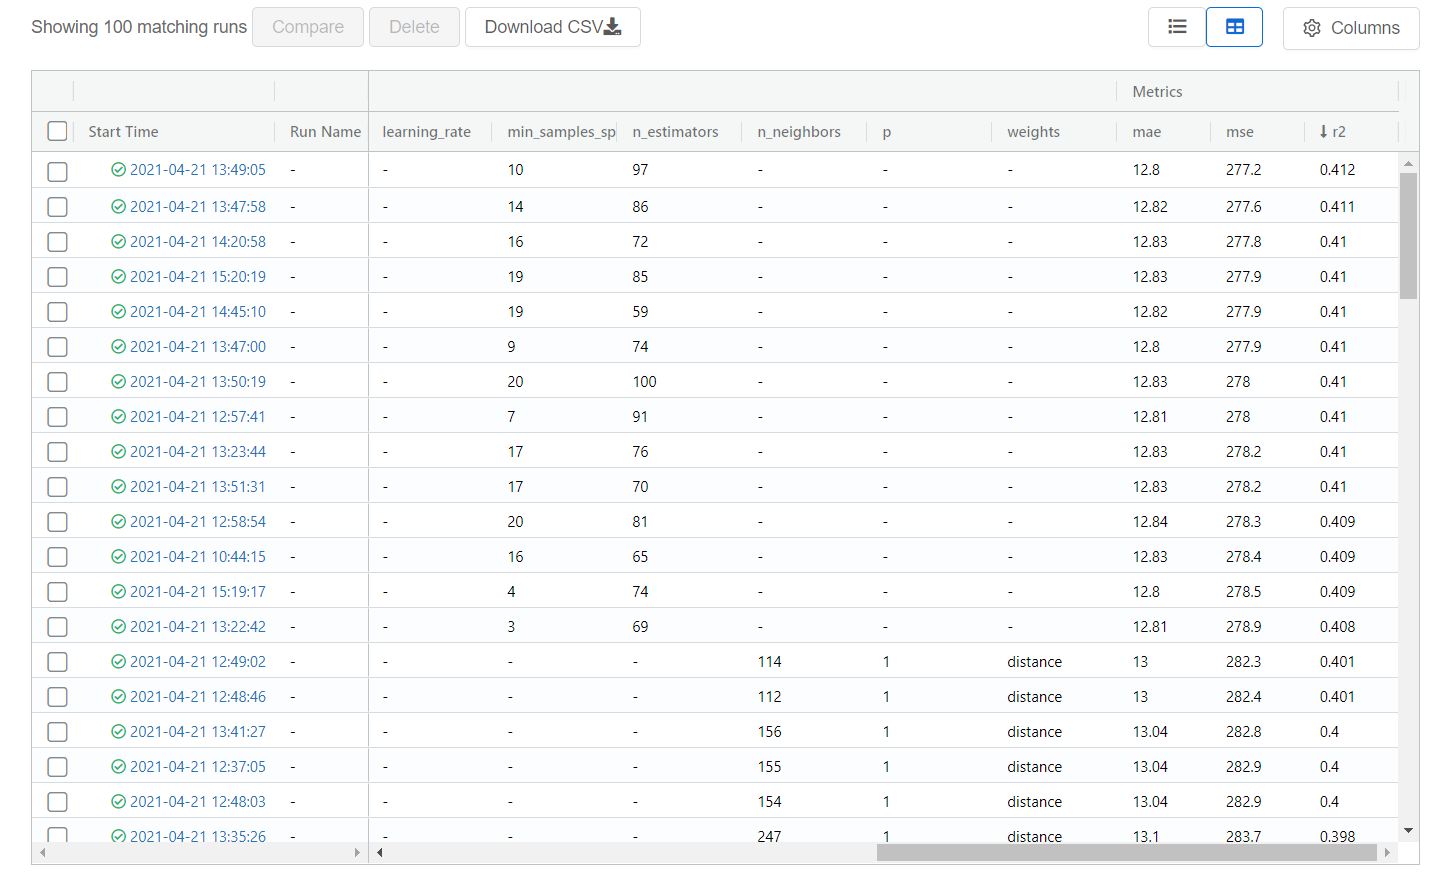

**A identificação dos diferentes modelos pode ser feita observando quais parametros são determinados a run escolhida**

### Verificando Desempenho dos Melhores Sub-Modelos no Conjunto de Teste

**1. ElasticNetRegressor** - {'alpha': 1.0108675523660866, 'l1_ratio': 0.9313001621295945}

In [ ]:
elnet = ElasticNet(alpha= 1.0108675523660866, l1_ratio= 0.9313001621295945)
elnet.fit(X_train, y_train)
elnet_predict = elnet.predict(X_test)
print("r2_score: ", r2_score(y_test, elnet_predict))

NameError: ignored

**2. KNeighborsRegressor** - {'n_neighbors': 156, 'weights': 'distance', 'p': 1}

In [ ]:
knn = KNeighborsRegressor(n_neighbors= 156, weights= 'distance', p= 1)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
print("r2_score: ", r2_score(y_test, knn_predict))

NameError: ignored

**3. RandomForestRegressor** - {'n_estimators': 97, 'criterion': 'mse', 'min_samples_split': 10}

In [ ]:
rforest = RandomForestRegressor(n_estimators= 97, criterion= 'mse', min_samples_split= 10)
rforest.fit(X_train, y_train)
rforest_predict = rforest.predict(X_test)
print("r2_score: ", r2_score(y_test, rforest_predict))

r2_score:  0.4065800275932572


**4. MLPRegressor** - {'hidden_layer_sizes': 190, 'activation': 'tanh', 'learning_rate': 'constant'}

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes= 190, activation= 'tanh', learning_rate= 'constant', max_iter= 500)
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)
print("r2_score: ", r2_score(y_test, mlp_predict))

Comparando os resultados obtidos, o modelo com maior desempenho no conjunto de teste foi o **RandomForestRegressor** com um r2_score de **0.40**

## Otimizando Modelo

O Modelo com melhor desempenho até agora foi o **RandomForestRegressor** utilizando **{'n_estimators': 97, 'criterion': 'mse', 'min_samples_split': 10}** como conjunto de hiperparâmetros. O qual, alcançou as seguintes metricas nos diversos conjuntos de dados: 

In [ ]:
rforest = RandomForestRegressor(n_estimators= 97, criterion= 'mse', min_samples_split= 10)
rforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=97, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#Conjunto de Treino
rforest_train_predict = rforest.predict(X_train)
print('Conjunto de Treino: {r2: ', r2_score(y_train, rforest_train_predict), ', mse: ', mean_squared_error(y_train, rforest_train_predict), ', mae: ', mean_absolute_error(y_train, rforest_train_predict), '}')
#Conjunto de Validação
rforest_val_predict = rforest.predict(X_validation)
print('Conjunto de Validação: {r2: ', r2_score(y_validation, rforest_val_predict), ', mse: ', mean_squared_error(y_validation, rforest_val_predict), ', mae: ', mean_absolute_error(y_validation, rforest_val_predict), '}')
#Conjunto de Test
rforest_test_predict = rforest.predict(X_test)
print('Conjunto de Teste: {r2: ', r2_score(y_test, rforest_test_predict), ', mse: ', mean_squared_error(y_test, rforest_test_predict), ', mae: ', mean_absolute_error(y_test, rforest_test_predict), '}')

Conjunto de Treino: {r2:  0.815261571953883 , mse:  86.78162253010373 , mae:  7.043969002016571 }
Conjunto de Validação: {r2:  0.41140707327435677 , mse:  277.3407538743492 , mae:  12.809437874856503 }
Conjunto de Teste: {r2:  0.407143191353208 , mse:  281.11782448918007 , mae:  12.883903521138478 }


Supondo que nosso valor alvo seja **85%** de precisão, podemos observar um viés de aproximadamente **5%** e uma variância em torno de **40%**.

*(Claramente nenhum desses dois valores é ideal)*

Dado esse contexto, mesmo sendo o maior dos problemas a generalização para conjuntos além do conjunto de treino, acredito que o modelo apresenta tanto Overfitting quanto Underfitting.

### Importando e Verificando Shap

In [1]:
!pip install shap
import shap
import xgboost

     |████████████████████████████████| 358kB 17.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491633 sha256=febf2f1d8f04fbeda6b1ff13cd242ff2a5f85be59677664b14654b2fd45cf5e1
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [2]:
model = xgboost.XGBRegressor().fit(X,y)
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.bar(shap.Explanation(feature_names= variables,values=shap_values))

NameError: ignored

### Solucionando Underfitting

Iremos tentar adicionar algumas outra features possivelmente relevantes como 'explicit', 'tempo' e 'loudness'.

[22:35:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


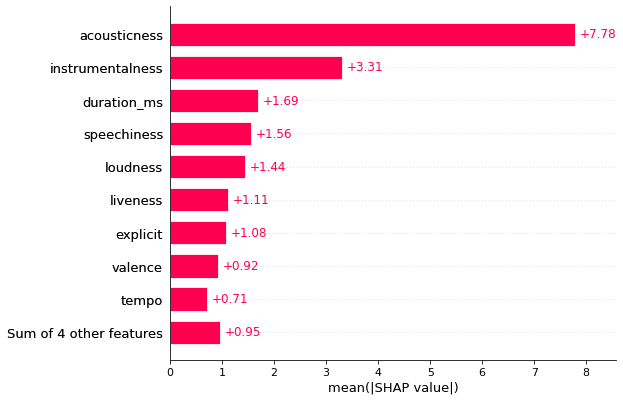

In [ ]:
udft_variables = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'explicit', 'tempo', 'loudness', 'key', 'mode', 'duration_ms']
X_udft = spotify[udft_variables]
udft_model = xgboost.XGBRegressor().fit(X_udft, y)
explainer = shap.Explainer(udft_model)
shap_values = explainer(X_udft)
shap.plots.bar(shap.Explanation(feature_names= udft_variables,values=shap_values))

As features 'loudness', 'explicit', 'tempo' e 'duration_ms' parecem features relevantes a se adicionar. Por isso, iremos separar novos conjuntos e treinar um novo modelo.

In [59]:
udft_variables = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'explicit', 'tempo','loudness', 'duration_ms']
X_udft = spotify[udft_variables]
X_udft_train, X_udft_test, y_udft_train, y_udft_test = train_test_split(X_udft, y, test_size=0.4, random_state=1)

In [ ]:
rforest_udft = RandomForestRegressor(n_estimators= 97, criterion= 'mse', min_samples_split= 10)
rforest_udft.fit(X_udft_train, y_udft_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=97, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#Conjunto de Treino
rforest_udft_train_predict = rforest_udft.predict(X_udft_train)
print('Conjunto de Treino: {r2: ', r2_score(y_udft_train, rforest_udft_train_predict), ', mse: ', mean_squared_error(y_udft_train, rforest_udft_train_predict), ', mae: ', mean_absolute_error(y_udft_train, rforest_udft_train_predict), '}')
#Conjunto de Test
rforest_udft_test_predict = rforest_udft.predict(X_udft_test)
print('Conjunto de Teste: {r2: ', r2_score(y_udft_test, rforest_udft_test_predict), ', mse: ', mean_squared_error(y_udft_test, rforest_udft_test_predict), ', mae: ', mean_absolute_error(y_udft_test, rforest_udft_test_predict), '}')

Conjunto de Treino: {r2:  0.8435039319186717 , mse:  73.55632521356921 , mae:  6.3968810336512645 }
Conjunto de Teste: {r2:  0.464530309362715 , mse:  251.97434153559394 , mae:  12.006392200358926 }


Nesse novo modelo, após a adição de novas features, podemos observar um viés menor que **1%** e uma variância ainda em torno de **38%**.

In [ ]:
#Atualizando Features
variables = udft_variables

### Solucionando o Overfitting

1° Tentaremos aumentar o tamanho do conjunto de treinamento em **20%**.

In [ ]:
X = spotify[variables]
y = spotify['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
rforest = RandomForestRegressor(n_estimators= 97, criterion= 'mse', min_samples_split= 10)
rforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=97, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#Conjunto de Treino
rforest_train_predict = rforest.predict(X_train)
print('Conjunto de Treino: {r2: ', r2_score(y_train, rforest_train_predict), ', mse: ', mean_squared_error(y_train, rforest_train_predict), ', mae: ', mean_absolute_error(y_train, rforest_train_predict), '}')
#Conjunto de Teste
rforest_test_predict = rforest.predict(X_test)
print('Conjunto de Teste: {r2: ', r2_score(y_test, rforest_test_predict), ', mse: ', mean_squared_error(y_test, rforest_test_predict), ', mae: ', mean_absolute_error(y_test, rforest_test_predict), '}')

Conjunto de Treino: {r2:  0.8383504833463763 , mse:  75.99871807058567 , mae:  6.515977306607759 }
Conjunto de Teste: {r2:  0.46124621200415994 , mse:  253.54659753003 , mae:  12.054546034882739 }


Pude observar que após essa alteração não houveram mudanças muito relevantes, então, manteremos a proporção inicial.

Agora, tentaremos simplificar o modelo retirando as features menos significativas.

[23:54:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


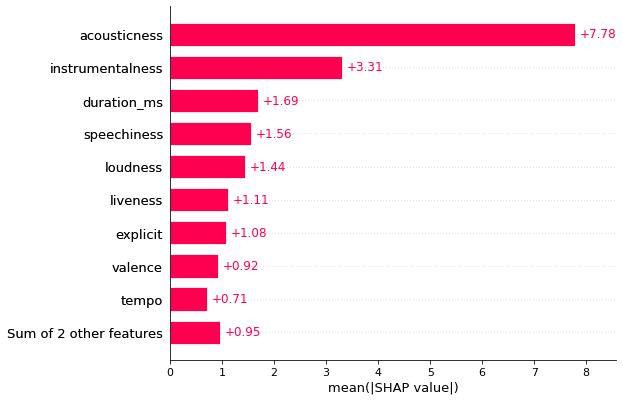

In [ ]:
model = xgboost.XGBRegressor().fit(X,y)
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.bar(shap.Explanation(feature_names= variables,values=shap_values))

As duas features menos significativas são 'danceability' e 'energy', iremos remove-las para observar o comportamento do modelo.

In [ ]:
variables = ['acousticness', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'explicit', 'tempo','loudness', 'duration_ms']
X = spotify[variables]
y = spotify['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
rforest = RandomForestRegressor(n_estimators= 97, criterion= 'mse', min_samples_split= 10)
rforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=97, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#Conjunto de Treino
rforest_train_predict = rforest.predict(X_train)
print('Conjunto de Treino: {r2: ', r2_score(y_train, rforest_train_predict), ', mse: ', mean_squared_error(y_train, rforest_train_predict), ', mae: ', mean_absolute_error(y_train, rforest_train_predict), '}')
#Conjunto de Test
rforest_test_predict = rforest.predict(X_test)
print('Conjunto de Teste: {r2: ', r2_score(y_test, rforest_test_predict), ', mse: ', mean_squared_error(y_test, rforest_test_predict), ', mae: ', mean_absolute_error(y_test, rforest_test_predict), '}')

Conjunto de Treino: {r2:  0.8305438808992829 , mse:  79.64781197904627 , mae:  6.694695028572026 }
Conjunto de Teste: {r2:  0.446900954660877 , mse:  260.27013328695574 , mae:  12.268282678193739 }


As alterações também não tiveram a relevancia esperada.

O melhor modelo de **RandomForestRegressor** encontrado nesse projeto possui  {'n_estimators': 97, 'criterion': 'mse', 'min_samples_split': 10} como conjunto de Hiperparâmetros e ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'explicit', 'tempo','loudness', 'duration_ms'] como conjunto de features.

Assim, chegando a alcançar nas metricas do conjunto de treinamento os valores:

- **0,843** para o r2_score
- **75.99** para o mean_square_error
- **6.39** para o mean_absolute_error

E, no conjunto de teste, os valores:

- **0.461** para o r2_score *(r2)*
- **253.54** para o mean_square_error *(mse)*
- **12.00** para o mean_absolute_eror *(mae)*

Com isso, dado o valor alvo de **85%** de precisão, o melhor modelo apresenta um viés de **0,7%** e uma variância de **38,2%**.

Provavelmente esses altos valores de variância tem forte relação com os Outliers que não foram removidos.

# **Conclusões**

Durante o processo pude colocar em prática grande parte do que aprendi na disciplina e ainda observar alguns insigths interessantes sobre o mundo musical:

1. A tendência é que cada vez mais faixas sejam produzidas por ano.

2. Ao longo dos anos houve uma diminuição da acustica nas faixas produzidas.

3. Há uma tendência para produção de faixas mais dançantes.

4. As músicas tem se tornado mais intensas e energicas.

5. Houve um aumento na produção de faixas com conteúdo explicito, alcançando em 2020 cerca de 25% das produções.

6. Existe uma predominância geral ao longo dos anos de faixas que não sejam gravadas ao vivo.

7. As faixas passaram a ter volumes mais altos ao longo dos anos.

8. Atualmente muitas faixas são lançadas e em sua maioria elas são impopulares.

9. A proporção de fala nas faixas ao longo dos anos tem se mantido relativamente constante.

10. As faixas tem, em média, apresentado um crescimento nas batidas por minuto.

11. As faixas apresentam um queda na positividade músical ao longo dos anos.

12. A acustica das faixas diminui a medida que a popularidade aumenta.

13. Claramente existe uma relação positiva entre a energia e a popularidade das faixas.

14. Conteúdos explicitos são em média mais populares que conteúdos não explicitos.

15. As musicas mais populares em média apresentam conteúdo vocal.

16. Há uma diferença relevante entre a popularidade das faixas explicitas e não explicitas.

**Possiveis Futuros Ajustes:**

Ainda existem alguns outliers que precisam ser removidos.

Gostaria de ter tido mais tempo para realizar mais testes de Hipótese mas infelizmente não consegui.

Qualquer Problema em Relação a este Projeto, só entrar em contato com
accs2@cin.ufpe.br.